<a id='back_to_top'></a>

# A Data-Driven Approach to Reparative Description at the University of Chicago
**Designed by Ashley Gosselar, 2022**

<center><a href="https://unsplash.com/photos/P-JX1Agg0Ts"><img src="ante-gudelj-P-JX1Agg0Ts-unsplash.jpg"/></a></center>

# Table of Contents
1. <a href='#introduction'>Introduction</a>
2. <a href='#methodology'>Methodology</a>
    * <a href='#gathering'>Gathering the Data</a>
        * <a href='#lexicon'>The Lexicon</a>
        * <a href='#xml_term_detective'>Using XML-Term-Detective</a>
    * <a href='#cleaning'>Cleaning and Enhancing the Data</a>
3. <a href='#cleaning'>Analysis</a>
    * <a href='#tableau'>Using Tableau</a>
    * <a href='#neo4j'>Using Neo4j</a>
    * <a href='#overview'>Analysis of Full Dataset</a>
    * <a href='#race'>Race, Ethnicity, Citizenship</a>
    * <a href='#sexism'>Sexism</a>
    * <a href='#aggrandizement'>Aggrandizement</a>
    * <a href='#slavery'>Slavery</a>
    * <a href='#ableism'>Ableism</a>
    * <a href='#colonialism'>Colonialism</a>
    * <a href='#incarceration'>Incarceration and Forced Removal</a>
    * <a href='#class'>Class</a>
4. <a href='#recommendations'>Recommendations</a>
    * <a href='#workflow'>Workflow</a>
    * <a href='#policy'>Policy Setting and Editing Finding Aids</a>
5. <a href='#resources'>Resources</a>
    * <a href='#examples'>Examples</a>
6. <a href='#appendix'>Appendix</a>

<a id='introduction'></a>

# Introduction

Reparative description of collections is a burgeoning element of diversity, equity, and inclusion efforts at cultural heritage institutions. Broadly speaking, reparative description aims to remediate or contextualize metadata about collections that exclude, silence, harm, or mischaracterize people. Reparative description practices strive to be accurate, inclusive, culturally competent, and respectful. Reparative description work can take may forms as illustrated in the graphic below from <a href="https://www2.archivists.org/sites/all/files/NAAS%20Reparative%20Description.pdf"> this presentation </a> about reparative description given by the Native American Archives Section of the Society of American Archivists in 2021.

<center><img src="pyramid illustration.jpg"/></center>

For many years, archivists at the University of Chicago Library’s Hanna Holborn Gray Special Collections Research Center have made inroads in the “Representation/Under-description” tier of the above illustration through a concerted effort to thoughtfully process and make accessible collections that represent diverse groups of people and organizations. However, due in part to severe staffing shortages, the Center has not invested significant time and resources in other tiers of the illustration. The Center maintains over 1600 online finding aids – a daunting amount of legacy metadata to review and remediate. 

To meet this challenge, I proposed a data-driven approach to identify and prioritize finding aids for reparative description. While the work of editing a finding aid through a reparative description lens <a href="https://kaylaheslin.com/description-as-an-art-and-a-craft/">is not something that can be automated or sensitively done without careful, time-intensive attention by a human being</a>, this project demonstrates that computational thinking can be applied to the planning stages of reparative description work. I tackled the question of “where do we begin?” by treating the Center’s 1600+ finding aids as data that can be harvested, transformed, and analyzed with computational methodologies. 

I am not the first archivist to try this. By searching the Internet, archival literature, and GitHub, and by informally surveying 75 members of a reparative description Slack channel for processing archivists, I arrived at the following list of archival institutions and archivists who are using computer script to audit their finding aids for potentially biased and harmful language:

<ul>
    <li><a href="https://blogs.princeton.edu/techsvs/2020/02/28/inclusive-description-working-group/">Princeton University Library, Special Collections.</a> <a href="https://github.com/kellybolding/scripts">Code by Kelly Bolding.</a></li>
    <li><a href="https://saadescription.wordpress.com/2021/11/15/how-getty-archivists-support-racial-justice/">Getty Research Institute’s Anti-Racist Description Working Group.</a> <a href="https://github.com/jerkmuffin/XML-Term-Dectective">Code by Laura Schroffel.</a></li>
    <li>University of Pittsburgh Library, Archives and Special Collections. <a href="https://github.com/kheslin0420/kheslin0420.github.io/tree/master/Legacy_Description_Audit">Code by Kayla Heslin.</a></li>
    <li><a href="https://blogs.library.duke.edu/bitstreams/2021/08/26/auditing-archival-description-for-harmful-language/">Duke University Rubenstein Library.</a> <a href="https://github.com/duke-libraries/description-audit">Code by Miriam Shams-Rainey.</a></li>
    <li><a href="https://github.com/houghton-ts/reparative-description">Harvard University Houghton Library.</a> Code by Vernica Downey.</li>
    <li><a href="https://github.com/YaleArchivesSpace/rad_scripts">Yale University Library.</a> Code by Alicia Detelich Boersig.</li>
    <li><a href="https://osf.io/tyk6q/">University of California, Riverside.</a> Code by Noah Geraci.</li>
</ul>

Factoring in limitations on my time, a lack of technical support, and my rudimentary understanding of XQuery, XSLT, regular expressions, and Python , I decided to not reinvent the wheel and write my own script. From this list, I chose Laura Schroffel’s Python script, “XML-Term-Detective” as my tool for scraping data from UChicago’s finding aids. I chose XML-Term-Detective because it utilizes a GUI and does not require a full understanding of Python to operate. I am grateful to Laura for graciously permitting me to use this code and publicly discuss my experience using it. 

This project builds upon the scripting work established by others to include other data curation steps. Thanks to knowledge gained in the <a href="https://ischool.umd.edu/academics/certificates-non-degree-study/digital-curation-for-information-professionals-certificate/">University of Maryland iSchool’s Digital Curation for Information Professionals certificate program</a>, I used a suite of data curation tools to clean, enhance, visualize, and analyze my data. In so doing, I was able to learn not just when and where biased or harmful language may occur in UChicago’s finding aids, but the scale and scope of the problem and which finding aids require the most remediation.  

The following is an explication of my methodology and the inferences and recommendations I drew from the data. It is written with two audiences in mind: my colleagues at the University of Chicago who will use this report to begin the slow but important work of reparative description of our finding aids, and a more general audience of archivists with basic technology skills embarking on reparative description work at their own institutions. By utilizing the format of a Jupytr Notebook, I hope to make this project more easily reproducible and repurpose-able for others. 

For beginners seeking a basic grasp of XQuery and XSLT, I recommend Library Juice Academy’s course <a href="https://libraryjuiceacademy.com/shop/course/052-transforming-querying-xml-xslt-xquery/">Transforming and Querying XML with XSLT and XQuery</a>. For an introduction to Python within a humanistic context, I recommend Melanie Walsh’s <a href="https://melaniewalsh.github.io/Intro-Cultural-Analytics/welcome.html">Introduction to Cultural Analytics & Python</a>. For a crash course in regular expressions, command line, and Git, I recommend <a href="https://librarycarpentry.org/">Library Carpentry workshops</a>. I used each of these courses to expand my technical skillset and prepare for this project.

<a href='#back_to_top'>Back to top</a>

<a id='methodology'></a>

# Methodology

<a id='gathering'></a>

## Gathering the Data

<a id='lexicon'></a>

### The Lexicon
XML-Term-Detective finds and counts terms from a csv list across a directory of xml files. UChicago’s finding aids are encoded in <a href="https://www.loc.gov/ead/">EAD</a> (an XML standard) and live in a directory accessible to staff (in other words, I did not need to export XML finding aids out of a system like ArchivesSpace and into a directory). Laura Schroffel helpfully shared the Getty Research Institute’s csv list of terms, which they call “the lexicon.” (Yale also happens to be using the Getty's lexicon to develop metadata action plans across their cultural heritage collections.)

I used the Getty’s lexicon of terms as my starting point. I came to think of the words in the lexicon as “red flag terms.” A word might be outright offensive (such as a racial slur), or it might indicate that the subject matter of a finding aid merits review to ensure that we are describing a collection in an inclusive and culturally competent way. 

There are several categories of terms in the lexicon:

<ul>
<li>Terms of aggrandizement (which we especially want to root out of Biographical/Historical notes)</li>
    <li>Ableist language</li>
    <li>Terms about race and ethnicity</li>
    <li>Language about citizenship (“alien” to refer to noncitizens or undocumented immigrants)</li>
    <li>Words related to class</li>
    <li>Words about incarceration or forced removal</li>
    <li>Terms that might tip us off to documentation of colonialism, genocide, or slavery. These finding aids could be reviewed for erasure or misrepresentation of Native Americans and enslaved people, for euphemistic language describing racial violence, or for description that glosses over relationships of power (for instance, if a white person is described as a planter or plantation owner with no allusion to the fact that they enslaved people on said plantation). </li>
    <li>Sexist language (women described as girls or only as “Mrs. Husband’s Name”)</li>
</ul>

I edited the Getty lexicon in several ways. I removed some terms that I knew would create “noise” in the data. For instance, I removed the word “great” because the University of Chicago archives holds records of its “Great Books” program that would clutter my dataset. I also removed words that had zero hits in our online finding aids database (words like “midlife” and “codger.”). 

I also added many words (see Added Terms below). XML-Term-Detective does not automatically look for variations of a word such as the pluralization, so I added those. I included additional terms of aggrandizement found in <a href="https://github.com/kellybolding/scripts">Kelly Bolding’s list for Princeton University</a>. I added words that occurred to me as I read the <a href="https://library.unc.edu/2022/06/conscious-editing-guide/">University of North Carolina, Chapel Hill’s Guide to Conscious Editing</a>, and selected additional words from <a href="https://github.com/kheslin0420/kheslin0420.github.io/blob/master/Legacy_Description_Audit/FA_audit_script.py">Kayla Heslin’s Legacy Description Audit script</a> for the University of Pittsburgh, which pulls from <a href="https://hatebase.org/">hatebase.org</a>, a repository of multilingual hate speech. I added terms suggested by colleagues based on their knowledge of our collections. 

#### Added Terms
<ul>
    <li>accomplished</li>
    <li>alien</li>
    <li>aliens</li>
    <li>aptitude</li>
    <li>authority</li>
    <li>coolie</li>
    <li>coolies</li>
    <li>creative</li>
    <li>creativity</li>
    <li>deformed</li>
    <li>deformity</li>
    <li>distinctive</li>
    <li>dynamic</li>
    <li>dynamism</li>
    <li>elite</li>
    <li>enfeebled</li>
    <li>girl</li>
    <li>idiot</li>
    <li>impressive</li>
    <li>incisive</li>
    <li>Indians</li>
    <li>instrumental</li>
    <li>interned</li>
    <li>internment</li>
    <li>invaluable</li>
    <li>morons</li>
    <li>negros</li>
    <li>negroes</li>
    <li>nigger</li>
    <li>niggers</li>
    <li>notable</li>
    <li>pioneer</li>
    <li>pioneers</li>
    <li>pioneered</li>
    <li>pioneering</li>
    <li>plantation</li>
    <li>planter</li>
    <li>planters</li>
    <li>relocate</li>
    <li>relocated</li>
    <li>reputation</li>
    <li>reservation</li>
    <li>squaw</li>
    <li>riot</li>
    <li>slaves</li>
    <li>tremendous</li>
</ul>

<a href='#appendix'>See Appendix to download final lexicon.</a>

#### Imperfections in the Lexicon
XML-Term-Detective does not search for phrases. Therefore, some language will be overlooked; for instance, aggrandizing language such as “father of,” “man of letters,” and “leading role.” <a href="https://github.com/duke-libraries/description-audit/blob/main/lexicons/lexicons.csv">Duke University’s script appears to handle phrases</a>, so it may be worth taking a second run at our finding aids with this script.

Many slurs and derogatory language are missing. There is some hate speech in the list, but it is not comprehensive. The <a href="https://github.com/kheslin0420/kheslin0420.github.io/tree/master/Legacy_Description_Audit">University of Pittsburgh script</a> searches for a longer list of slurs by pulling from hatebase.org. This is another script worth trying in the future. The slurs that I did include are listed because examples popped up when I searched for them in our finding aids database. A lot of the slurs I included in the lexicon appear in old titles (for instance, in published song titles held in our jazz collections). 

LGBTQ+ terms do not appear in the lexicon. The original Getty lexicon does not include any LGBTQ+ terms, and the University of Pittsburgh’s script only uses a couple. Duke University’s lexicon does include some LGBTQ+ terms, but not many. Through discussion with UChicago colleagues, I decided that a review of LGBTQ+ collections merited a different approach to reparative description planning. <a href="https://homosaurus.org/">LGBTQ+ vocabulary is vast and evolving</a>, and a lot of derogatory terms have been reclaimed by some members of the LGBTQ+ community. Therefore, flagging LGBTQ+ terms via XML-Term-Detective may not be a useful activity. Additionally, words like “dyke” result in a lot of noise in the data because it is fairly common as a surname or as a part of a surname. We need to be very careful to not mis-gender or mis-identify someone’s sexuality when the historic record does not clearly spell out how a person identified themselves. (we similarly need to tread lightly around descriptions of a person’s race.) In this context, XML-Term-Detective feels like the adage “if your only tool is a hammer then every problem looks like a nail.” A better approach to reparative description of LGBTQ-related collections would be to follow models such as the <a href="https://doi.org/10.5281/zenodo.6687057">Metadata Best Practices for Trans and Gender Diverse Resources</a> by the Trans Metadata Collective, and the <a href="https://www.digitaltransgenderarchive.net/">Digital Transgender Archive</a> which uses the <a href="https://homosaurus.org/">Homosaurus</a>. We also need to ensure that LGBTQ+ collections in our care have finding aids, and that they are not under-described. This is important work, and a job that can’t easily be jump-started with a tool like XML-Term-Detective.


<a id='bias'></a>

##### Bias Bias Bias! ⚠️ 

Finally, I acknowledge that any lexicon, including my own, may be fraught with unconscious bias. Any time we describe or categorize human beings we risk the pitfalls of our own narrow worldview and understanding of the human experience. <a href="https://nyupress.org/9781479837243/algorithms-of-oppression/">Computer programs are made by humans and subject to bias.</a> Tools like XML-Term-Detective are not magic bullets for reparative description. I am using XML-Term-Detective as a starting point only. Reparative description is complex, iterative work that cannot be accomplished with “Find and Replace.” <a href="https://link.springer.com/article/10.1007/s10502-019-09307-x">Rather, it necessitates slowing down, listening carefully, and thinking critically.</a> My hope for this project is that it helps UChicago and other institutions to begin this work in an efficient way and chart a logical path through a complex landscape.

<a href='#back_to_top'>Back to top</a>

<a id='xml_term_detective'></a>

### Using XML-Term-Detective
Now let’s roll up our sleeves and get to work! To use XML-Term-Detective, you need to install Python on your computer. I followed <a href="https://melaniewalsh.github.io/Intro-Cultural-Analytics/02-Python/01-Install-Python.html">Melanie Walsh’s instructions for installing Anaconda and launching JupyterLab</a>. You also need to <a href="https://github.com/jerkmuffin/XML-Term-Detective/blob/main/README.md">download XML-Term-Detective from GitHub</a>.

Next, make sure you know where your lexicon is saved to your computer and that it is saved as a csv file.

Then, make sure that your finding aid xml files are saved to a directory that XML-Term-Detective can access.

After launching JupyterLab from Anaconda, open a terminal in JupyterLab.

In the terminal, type `cd XML-Term-Detective`

Then type `python XMLTermDetective.py` into the terminal.

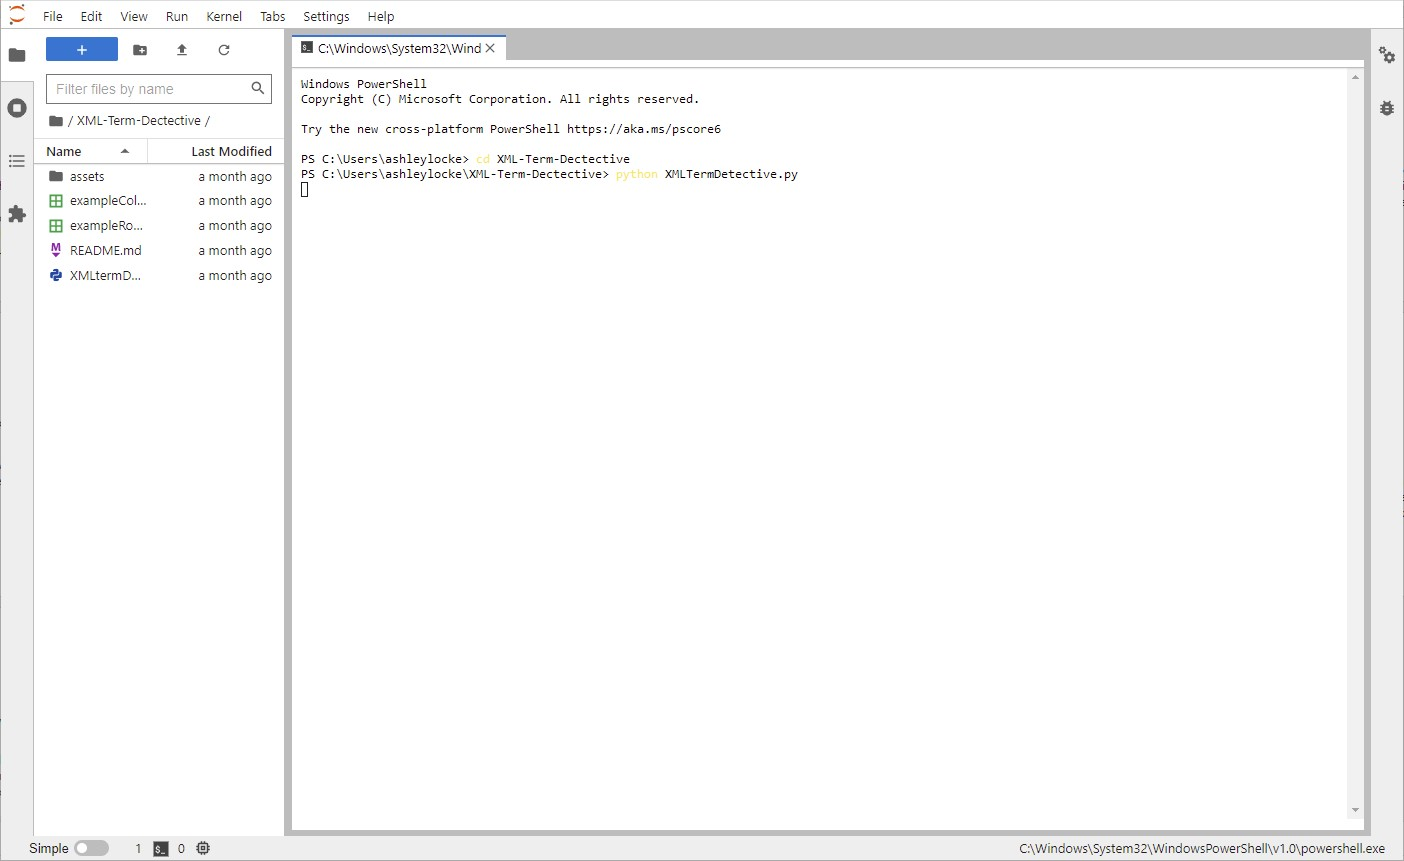

A GUI window opens!<br>
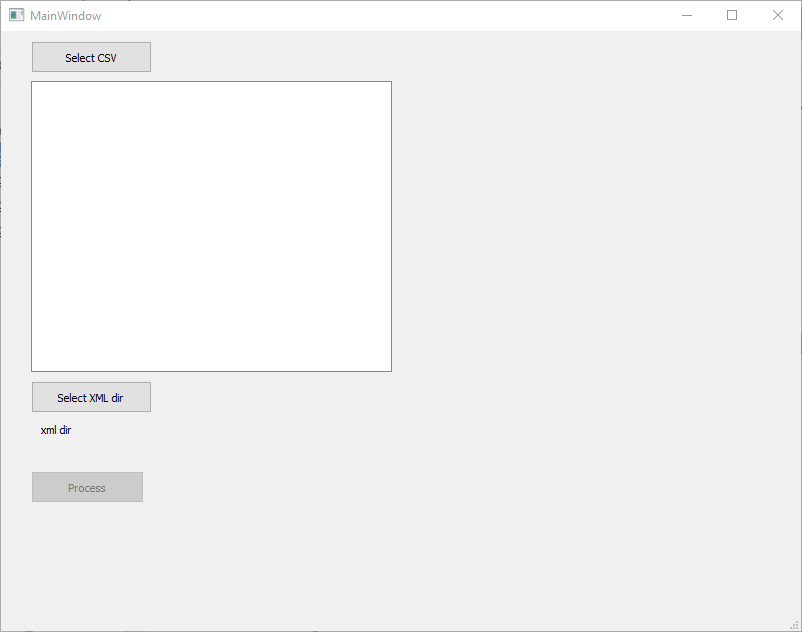

<a href="https://github.com/jerkmuffin/XML-Term-Dectective/blob/main/README.md">Follow Laura Schroffel’s instructions in the ReadMe file on GitHub</a> for using XML-Term-Detective.

XML-Term-Detective produces two output files (csv format). One output lists the xml files in which red flag terms were located, the particular term that was located, the line number in the xml in which the term was located, and the text of that line. The other output shows how many times each red flag term was found in an xml file (including zero). <a href='#appendix'>See Appendix to download my two output files.</a>

<a href='#back_to_top'>Back to top</a>

<a id='cleaning'></a>

## Cleaning and Enhancing the Data
First, a disclaimer. I am a novice data wrangler. Someone with more data science experience would likely have savvier ways of cleaning and transforming this data.

I looked at the data first in Excel. If a term had zero hits in the “count” output, I removed it from the lexicon and ran it back through XML-Term-Detective. Nine terms from my lexicon were removed. 

I then uploaded the full output csv into a cloud-based data wrangling tool called <a href="https://www.trifacta.com/">Trifacta</a>. As of this writing, you can get a 30-day free trial of Trifacta, and if you are a student you can extend that free trial for a year.

<a href="https://docs.trifacta.com/display/AWS/Import+Basics">Instructions for importing data into Trifacta</a>.

In Trifacta, I sorted the data alphabetically by term (the WORD column). Using the histogram at the top of the “word” column, I looked at which terms were found the most, and started with those. (I eventually went row by row through the entire output.) 

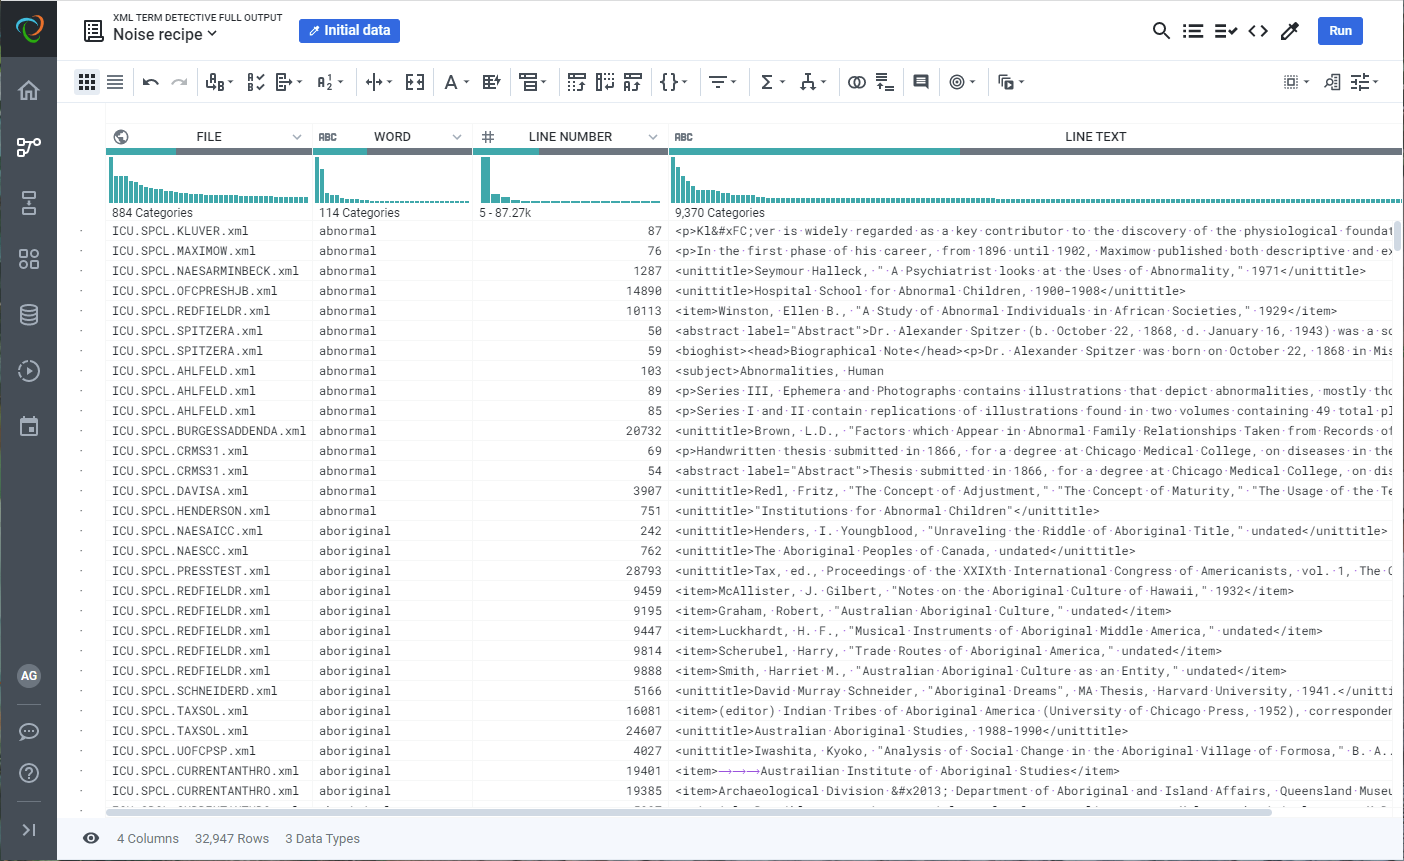

I deleted rows that were “noise” in the data. The following functions proved especially useful in my “recipe”: 

1. This function will delete rows that find specified terms in two columns:<br>
(**Note: This function is case-sensitive so you need to search for uppercase and lowercase spellings.**)<br><br>
`Delete rows where MATCHES([{column name}], 'term or phrase|another term or phrase|another term or phrase', false) && MATCHES([{column name}], 'term', false)` <br><br>
For example, XML-Term-Detective found many innocent words that include “psycho” such as “psychology,” “psychiatrist,” and “psychoanalyst.” I wanted to remove this noise from my data. So, I wrote my function this way:<br><br>
`Delete rows where MATCHES([{LINE TEXT}], 'psychol|psychi|psychoa', false) && MATCHES([{WORD}], 'psycho', false)`

2. Certain terms of aggrandizement, such as "notable" and "popular" create noise in the data. I am most concerned about terms of aggrandizement that appear in the Biog/Hist and Scope notes. I deleted any results where the line text contains unittitle or subject tags as this indicates a folder heading, related resource, or subject heading containing the term, rather than a paragraph tag within a Biog/Hist or Scope Note containing the term.<br><br>
`Delete rows where MATCHES([{LINE TEXT}], `<unittitle>|<another tag>`, false) && (MATCHES([{WORD}], 'term', false) || MATCHES([{WORD}], 'another term', false))`<br><br>
For example,<br><br>
    `Delete rows where MATCHES([{LINE TEXT}], `<unittitle>|<subject>`, false) && (MATCHES([{WORD}], 'notable', false) || MATCHES([{WORD}], 'popular', false))`

3. If a collection was creating noise in the data, I eliminated it this way:<br><br>
`Delete rows where MATCHES([FILE], 'filename’, false) && MATCHES([{WORD}], 'term', false)`<br><br>
For example, I knew that “Indian” in the Chandrasekhar papers referred to people from South Asia, not Native Americans. So, I wanted to eliminate that collection from the data when it was flagged for that term.<br><br>
`Delete rows where MATCHES([FILE], 'ICU.SPCL.CHANDRASEKHAR’, false) && MATCHES([{WORD}], 'Indian', false)`

**This was a time-intensive step, but worthwhile because it reduced my dataset from nearly 33,000 rows to a little over 11,000 rows (approximately two-thirds of my output was “noise”).** 

Before feeding my data into visualization software for analysis, I removed the “LINE NUMBER” and “LINE TEXT” columns. 

I also categorized my red flag terms and broke the large dataset down into smaller datasets by category. This anticipates the need to do reparative description in phases utilizing different remediation techniques/approaches (first, we’ll tackle terms of aggrandizement, then we’ll look at ableist language, etc.). Categorizing some of the terms felt fraught with subjectivity (see <a href='#bias'>“Bias Bias Bias!”</a> above). However, breaking the data apart in this way resulted in clearer visualizations and made analysis easier. 

I added category columns to my dataset (some words might fit in more than one category) so that I could see which types of “red flag” terms occur the most in our finding aids.
I saved my cleaned and enhanced dataset as: xml-term-detective-enhanced.csv. <a href='#appendix'>See Appendix to download my cleaned and enhanced XML-Term-Detective output.</a>

### Categories
<ul>
    <li>Ableism</li>
    <li>Aggrandizement</li>
    <li>Class</li>
    <li>Colonialism</li>
    <li>Incarceration and Forced Removal</li>
    <li>Race, Ethnicity, and Citizenship</li>
    <li>Sexism</li>
    <li>Slavery</li>
</ul>

<a id='analysis'></a><a href='#back_to_top'>Back to top</a>

# Analysis
Visualizing the data in Tableau and Neo4j helped me to see trends in the data, enabling me to make decisions about how to prioritize finding aids for reparative description.

<a id='tableau'></a>

## Tableau
Tableau is a visual data analytics platform. I used a free trial of <a href="https://www.tableau.com/products/desktop">Tableau Desktop</a>, saved the dashboards to my computer should I ever have access to Tableau Desktop again, and uploaded the finished visualizations to <a href="https://www.tableau.com/products/public">Tableau Public</a>. Tableau Public is free and can do most things that Tableau Desktop can do. The downside to Tableau Public is an inability to export your visualizations or save your work locally and edit projects privately over time. 

<a href="https://help.tableau.com/current/guides/get-started-tutorial/en-us/get-started-tutorial-home.htm">Tutorial: Get Started with Tableau Desktop</a>

<a href="https://public.tableau.com/en-us/s/resources">Resources for getting started with Tableau Public</a>

<a id='neo4j'></a>

## Neo4j
<a href="https://neo4j.com/download/">Neo4j</a> is a graph database platform. A graph database stores nodes and relationships instead of tables, or documents. I used the <a href="https://neo4j.com/download/">Neo4j Desktop app</a> (free one-year trial if you are a student as of this writing) to visualize the “worst offender” finding aids (those with the highest red flag term counts). A zip file containing all of my "worst offender" Neo4j graphs (more than are rendered in this Notebook) is <a href='#appendix'>available for download in the Appendix.</a>

<a href="https://neo4j.com/docs/getting-started/4.4/">Getting Started Guide for Neo4j</a>

<a href="https://neo4j.com/docs/desktop-manual/current/operations/create-dbms/">Start a Project in Neo4j</a> and <a href="https://neo4j.com/docs/desktop-manual/current/visual-tour/#files">upload your data</a>.

Neo4j uses its own <a href="https://neo4j.com/docs/cypher-manual/4.4/#cypher-manual">“cypher” language</a>. (**Pro tip: Cypher can easily break if something isn’t typed just write. For each of the cypher commands that I used, I needed to delete and retype the double or single quotation marks in my command to get it to work.**)

To load my data into Neo4j, I used the following cypher command:


`LOAD CSV WITH HEADERS FROM “file:///xml-term-detective-enhanced.csv” AS row
MERGE (f:File {Filename: row.FILE})
MERGE (w:Word {RedflagTerm: row.WORD})
MERGE (c:Category {Type: row.CATEGORY1})
MERGE (f)-[rf:Has_redflag_term]->(w)
MERGE (w)-[ct:Has_category]->(c)
RETURN f, w, c, rf, ct`

To visualize the red-flag terms and categories in a particular finding aid, I used the following command:<br>
`MATCH (f:File {Filename: 'ICU.SPCL.TAXSOL.xml'})-[Has_redflag_term]-(w:Word)
MATCH (c:Category)
RETURN f, w, c`


To see all the red flag terms in a particular category:<br>
`MATCH (c:Category {Type: 'aggrandizement'})-[]-(w:Word) RETURN c, w`

To see all of the finding aids that contain a particular red flag term:<br>
`MATCH (f:File)-[Has_redflag_term]-(w:Word {RedflagTerm: 'girl'})
RETURN f, w`

To see all of the red flag terms in a particular finding aid:<br>
`MATCH (f:File {Filename: 'ICU.SPCL.STEINERJ.xml'})-[Has_redflag_term]-(w:Word)
RETURN f, w`

<a id='analysis'></a><a href='#back_to_top'>Back to top</a>

<a id='overview'></a>

## Overview of Tableau Visualizations for Full Dataset
I created visualizations for the full dataset, and I created visualizations for the smaller sets of categorized data. I created Dashboards for each category, and then strung the Dashboards together into a <a href="https://public.tableau.com/views/Red_Flag_Visualizations/UniversityofChicagoLibraryFindingAidsFlaggedforReparativeDescriptionReview?:language=en-US&:display_count=n&:origin=viz_share_link">Tableau Story.</a> (A static PDF version of all Tableau visualizations is <a href='#appendix'>availabe for download in the Appendix.</a>)

<div class='tableauPlaceholder' id='viz1660152626230' style='position: relative'><noscript><a href='#'><img alt='University of Chicago Library Finding Aids Flagged for Reparative Description Review ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Re&#47;Red_Flag_Visualizations&#47;UniversityofChicagoLibraryFindingAidsFlaggedforReparativeDescriptionReview&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Red_Flag_Visualizations&#47;UniversityofChicagoLibraryFindingAidsFlaggedforReparativeDescriptionReview' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Re&#47;Red_Flag_Visualizations&#47;UniversityofChicagoLibraryFindingAidsFlaggedforReparativeDescriptionReview&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1660152626230');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1016px';vizElement.style.height='991px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

I created five visualizations of all “red flag” terms:
<ol><li>A histogram showing the number of times a “red flag” term appears across all of UChicago’s finding aids. Terms are arranged from highest count to lowest.</li>
    <li><a href="https://public.tableau.com/views/CategoriesofRedFlagTermsinFindingAids/CategoriesofRedFlagTerms?:language=en-US&:display_count=n&:origin=viz_share_link">A histogram showing the number of “red flag” terms in each category. (Not in Tableau Story)</a></li>
<li>A bar graph showing all “red flag” terms from highest count to lowest count, and the finding aids that contain that term. </li>
<li>The same bar graph as above, excluding the top three “red flag” terms, “Indian, “Indians, and “Mrs.” These terms far outweigh other terms, and excluding them helped me to see other problem areas.</li> 
<li>A histogram showing finding aids arranged from “worst offender” (highest term count) to “least offender” (lowest term count), excluding those flagged for the terms “Indian,” “Indians,” and “Mrs.”</li></ol>

These visualizations indicate that we have the most review work to do for finding aids with language about race, ethnicity, and citizenship. Terms “Indian” and “Indians” make up 71% of the race, ethnicity, and citizenship category. Finding aids containing terms about women are the next highest category, with the term “Mrs.” accounting for 80% of that category. Terms of aggrandizement are the third-highest category.  

If “Indian,” “Indians,” and “Mrs.” are excluded, the top three categories remain the same, but terms of aggrandizement take the lead, followed by race, ethnicity, and citizenship terms, then sexist language.

The following analyses reflect the second histogram and are arranged by category from those with the highest red flag term counts to those with the lowest term counts.

<a id='analysis'></a><a href='#back_to_top'>Back to top</a>

<a id='race'></a>

## Race, Ethnicity, Citizenship

I created <a href="https://public.tableau.com/views/RaceEthnicityandCitizenshipLanguageinFindingAidsFlaggedforReview/RaceEthnicityandCitizenshipLanguageinFindingAids?:language=en-US&:display_count=n&:origin=viz_share_link">five Tableau visualizations of race, ethnicity, and citizenship terms</a>:
1. A histogram showing the number of times a “red flag” term in this category appears across all UChicago finding aids.
2. A bubble graph showing the top terms in this category across all UChicago finding aids.
3. A bar graph showing terms in this category from highest count to lowest, and the finding aids that contain them.
4. A histogram showing finding aids arranged from “worst offender” in this category (highest term count) to “least offender” (lowest term count).
5. A histogram showing finding aids arranged from “worst offender” to “least offender” in this category, with “Indian” and “Indians” excluded.

<div class='tableauPlaceholder' id='viz1660154969901' style='position: relative'><noscript><a href='#'><img alt='Race, Ethnicity, and Citizenship Language in Finding Aids ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ra&#47;RaceEthnicityandCitizenshipLanguageinFindingAidsFlaggedforReview&#47;RaceEthnicityandCitizenshipLanguageinFindingAids&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='RaceEthnicityandCitizenshipLanguageinFindingAidsFlaggedforReview&#47;RaceEthnicityandCitizenshipLanguageinFindingAids' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ra&#47;RaceEthnicityandCitizenshipLanguageinFindingAidsFlaggedforReview&#47;RaceEthnicityandCitizenshipLanguageinFindingAids&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1660154969901');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='1327px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

<br><br>
The terms “Indian,” “Indians,” “negro,” “negroes,” “oriental,” and “primitive” account for 90% of the terms in this category. 

The <a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.TAXSOL">Sol Tax Papers finding aid</a> contains the highest counts of “Indian” and “Indians,” and the most terms in this category overall.
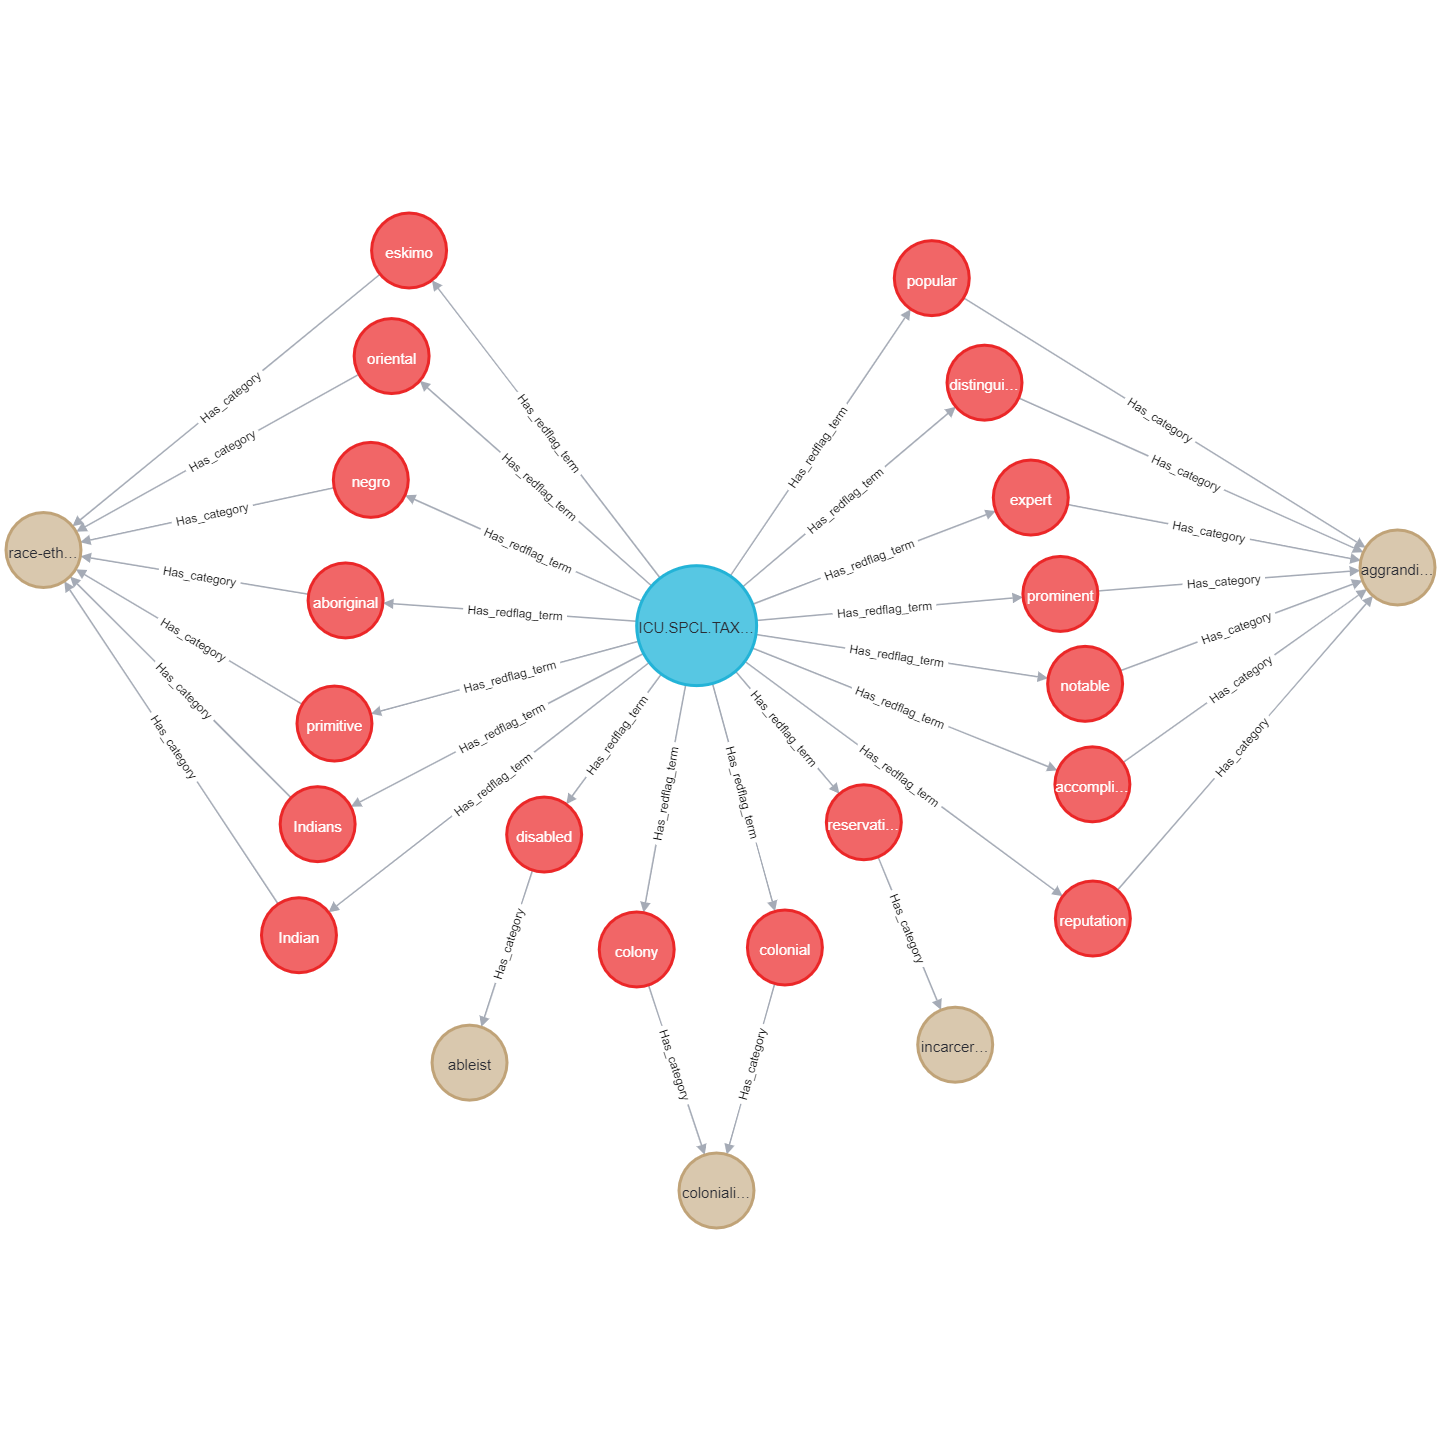

Many finding aids from our <a href="https://www.lib.uchicago.edu/scrc/finding-aids/?searchq=naes">Native American Educational Services collection</a>s account for some of the highest instances of “Indian” and “Indians,” which is unsurprising. 

The <a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.ROSENWALDJ">Julius Rosenwald Papers finding aid</a> has the highest counts of “negro” and “negroes.” 
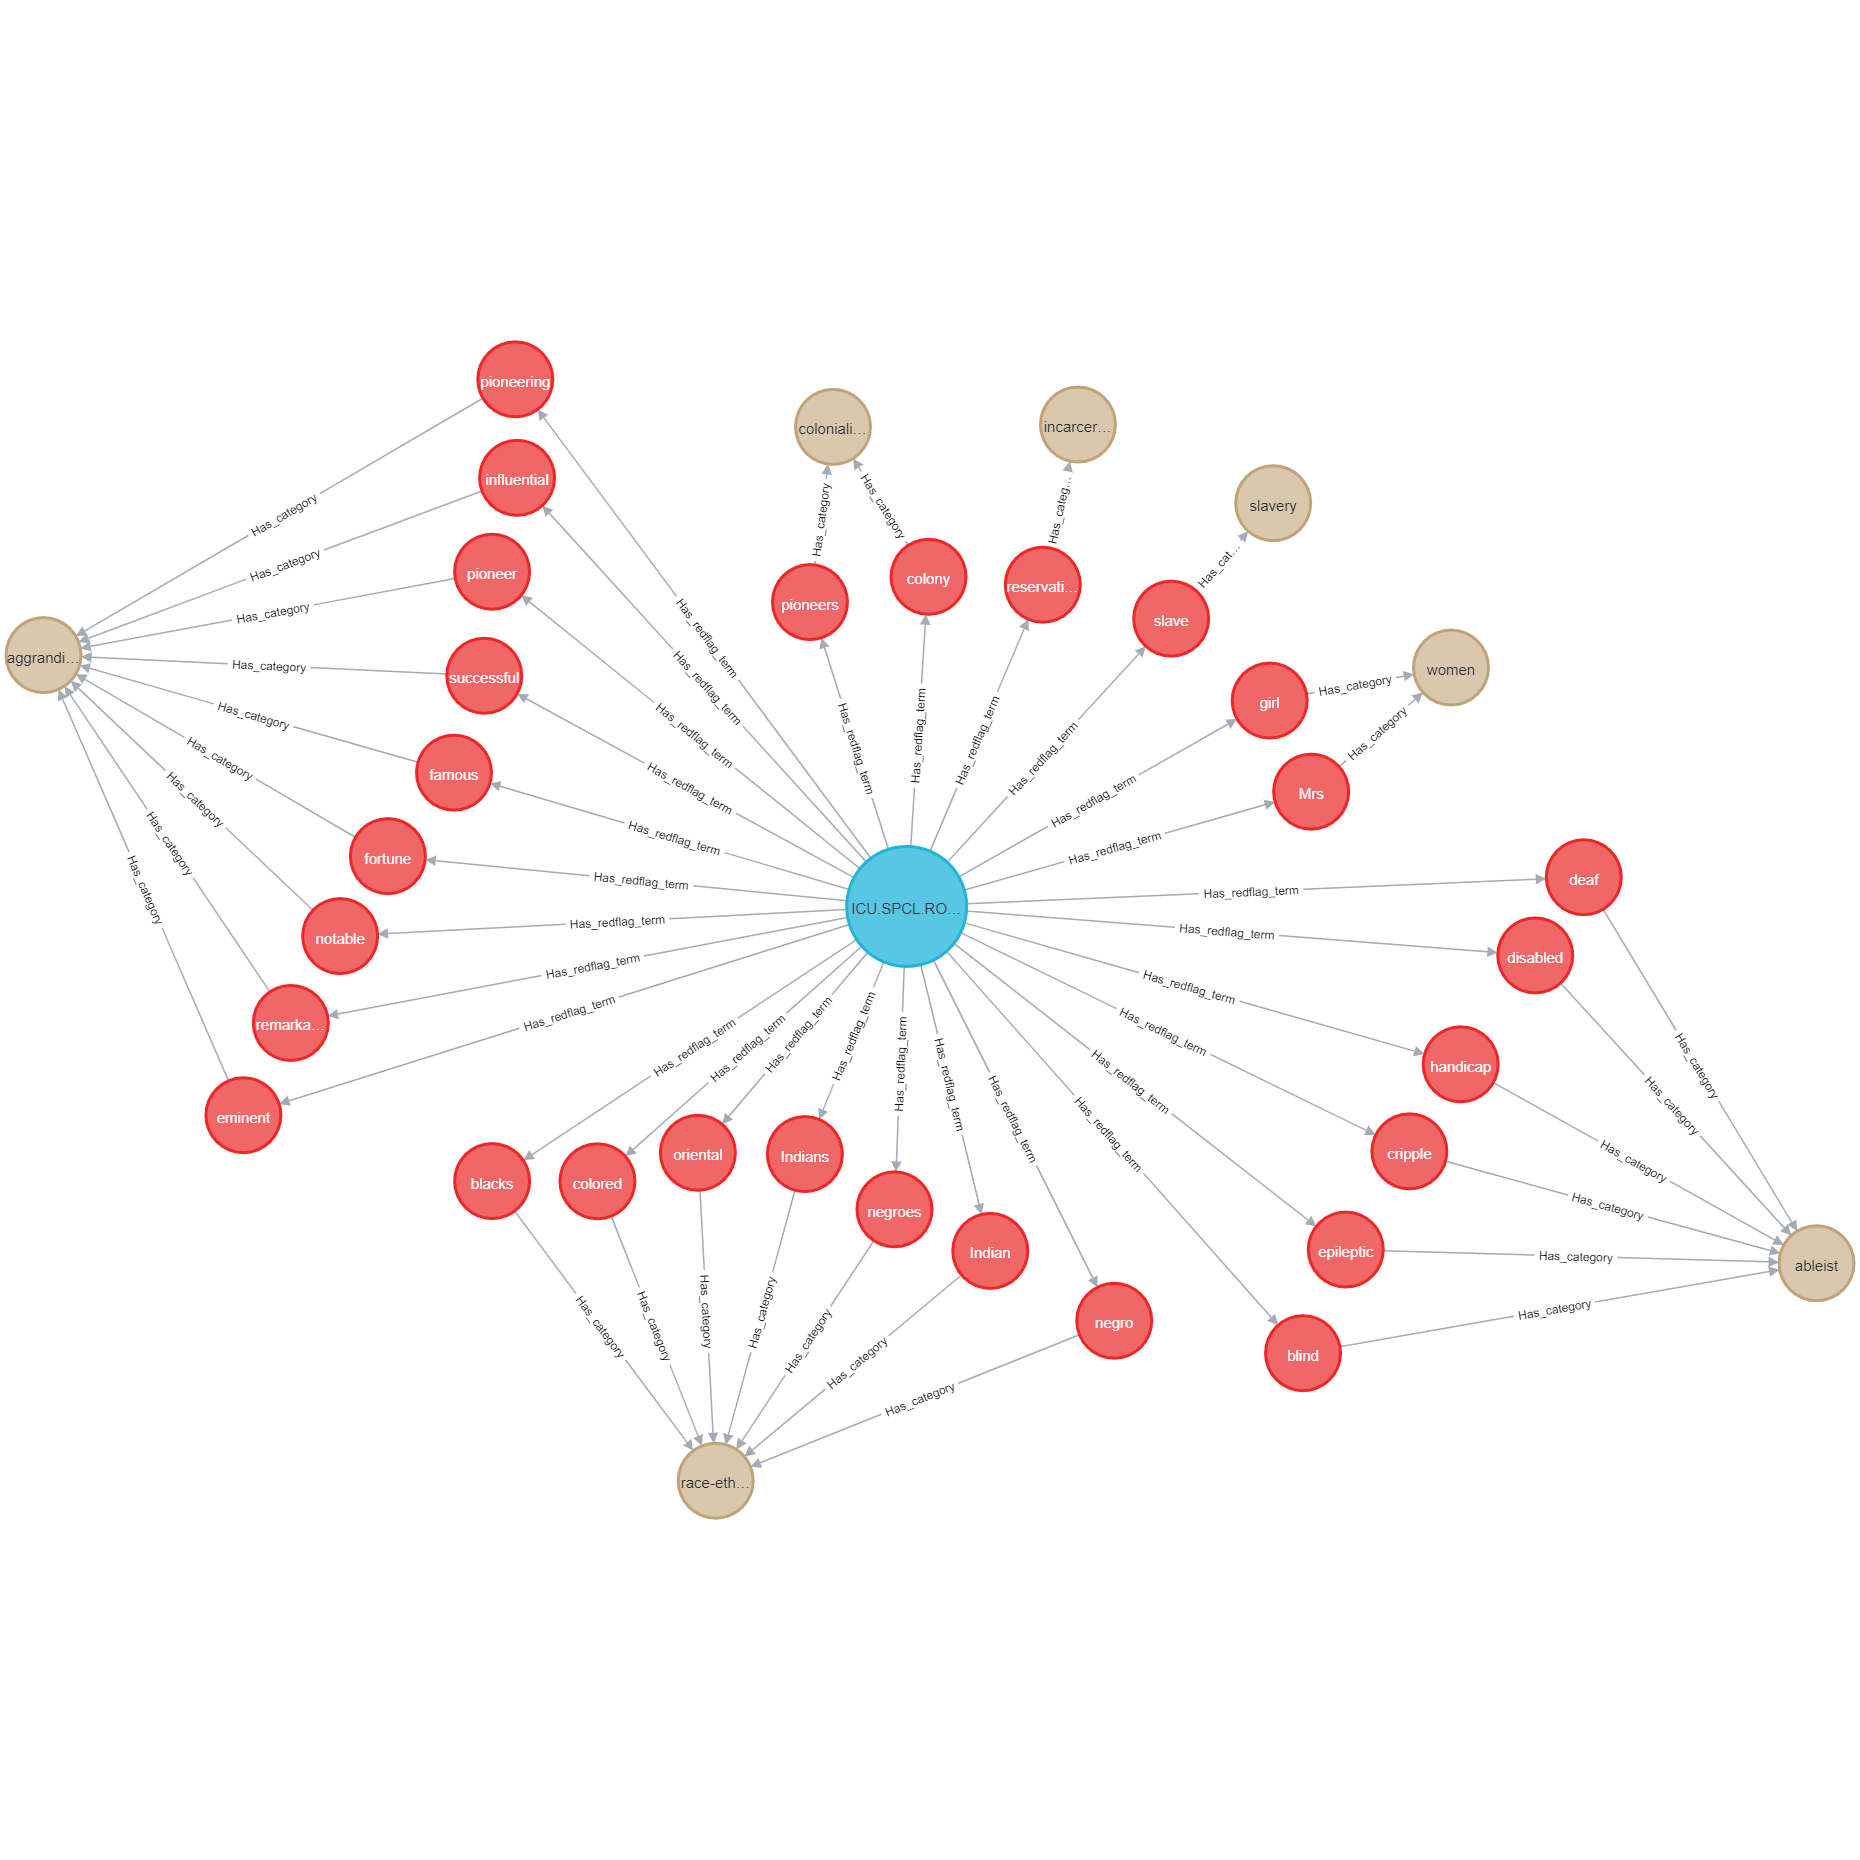

The <a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.KRAUSP">Paul Kraus Papers finding aid</a> contains the most instances of “oriental,” and the <a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.REDFIELDR">Robert Redfield Papers finding aid</a> contains the most instances of “primitive.”

<a id='analysis'></a><a href='#back_to_top'>Back to top</a>

<a id='sexism'></a>

## Sexism
<a href="https://public.tableau.com/views/SexistLanguageinFindingAidsFlaggedforReview/SexistLanguageinFindingAids?:language=en-US&:display_count=n&:origin=viz_share_link">I created four visualizations in this category:</a>

1. A histogram showing the number of times a “red flag” term in this category appears across all UChicago finding aids.
2. A bar graph showing terms in this category from highest count to lowest, and the finding aids that contain them.
3. A histogram showing finding aids arranged from “worst offender” for the red flag “Mrs.” (highest term count) to “least offender” (lowest term count).
4. A histogram showing finding aids arranged from “worst offender” for the red flag “girl” (highest term count) to “least offender” (lowest term count).

<div class='tableauPlaceholder' id='viz1660183077098' style='position: relative'><noscript><a href='#'><img alt='Sexist Language in Finding Aids ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Se&#47;SexistLanguageinFindingAidsFlaggedforReview&#47;SexistLanguageinFindingAids&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='SexistLanguageinFindingAidsFlaggedforReview&#47;SexistLanguageinFindingAids' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Se&#47;SexistLanguageinFindingAidsFlaggedforReview&#47;SexistLanguageinFindingAids&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1660183077098');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='1077px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

The red flag term “Mrs.” far outweighs “girl” in this category. Anticipating that review and possible remediation of “Mrs.” and “girl” will require different approaches, I graphed the worst offending finding aids for those terms separately. 

Three finding aids account for 76% of occurrences of “Mrs.”:
<ul>
    <li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.EHPAEPCKE">Paepcke, Elizabeth H. Papers</a> (Neo4j graph below)</li>
    <li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.WMHARPER">Harper, William Rainey. Papers</a></li>
    <li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.DOUGLASSA">Douglas, Stephen A. Papers</a></li>
</ul>

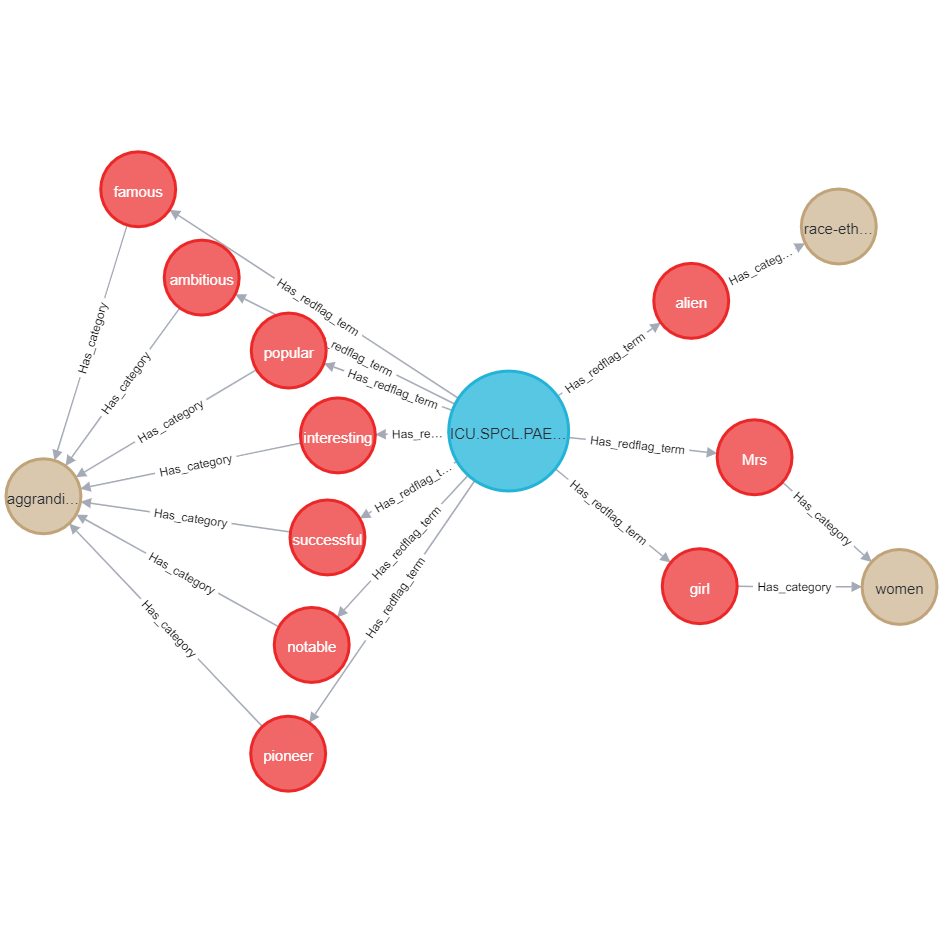

13 finding aids have double-digit occurrences of “girl” and account for 58% of this term:
<ul>
<li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.STEINERJ">Steiner, John. Collection</a> (Neo4j graph below)</li>
<li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.MORTONAGENCY">Morton, Charles, Agency. Collection of American Popular Drama</a></li>
<li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.MOTIONPICTURE">Motion Picture Stills. Collection</a></li>
<li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.SONGSHEET">Song Sheet and Broadside Poem. Collection</a></li>
<li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.MANNINGR">Manning, Richard. Band. Collection</a></li>
<li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.NOYESPHOTOS">Noyes, Ida. Papers</a></li>
<li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.WILLISA">Willis, Alfred. Collection of African-American Popular Fiction</a></li>
<li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.EGGANJ">Eggan, Joan Rosenfels. Papers</a></li>
<li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.POPLIT">Popular Literature. Collectio</a></li>
<li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.BURGESS">Burgess, Ernest Watson. Papers</a>li>
<li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.BURGESSADDENDA">Burgess, Ernest Watson. Papers. Addenda</a></li>
<li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.GOLDMAN">Goldman, Samuel. Papers</a></li>
<li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.PIANOSONG">Jazz Piano Song Sheet. Collection</a></li>
</ul

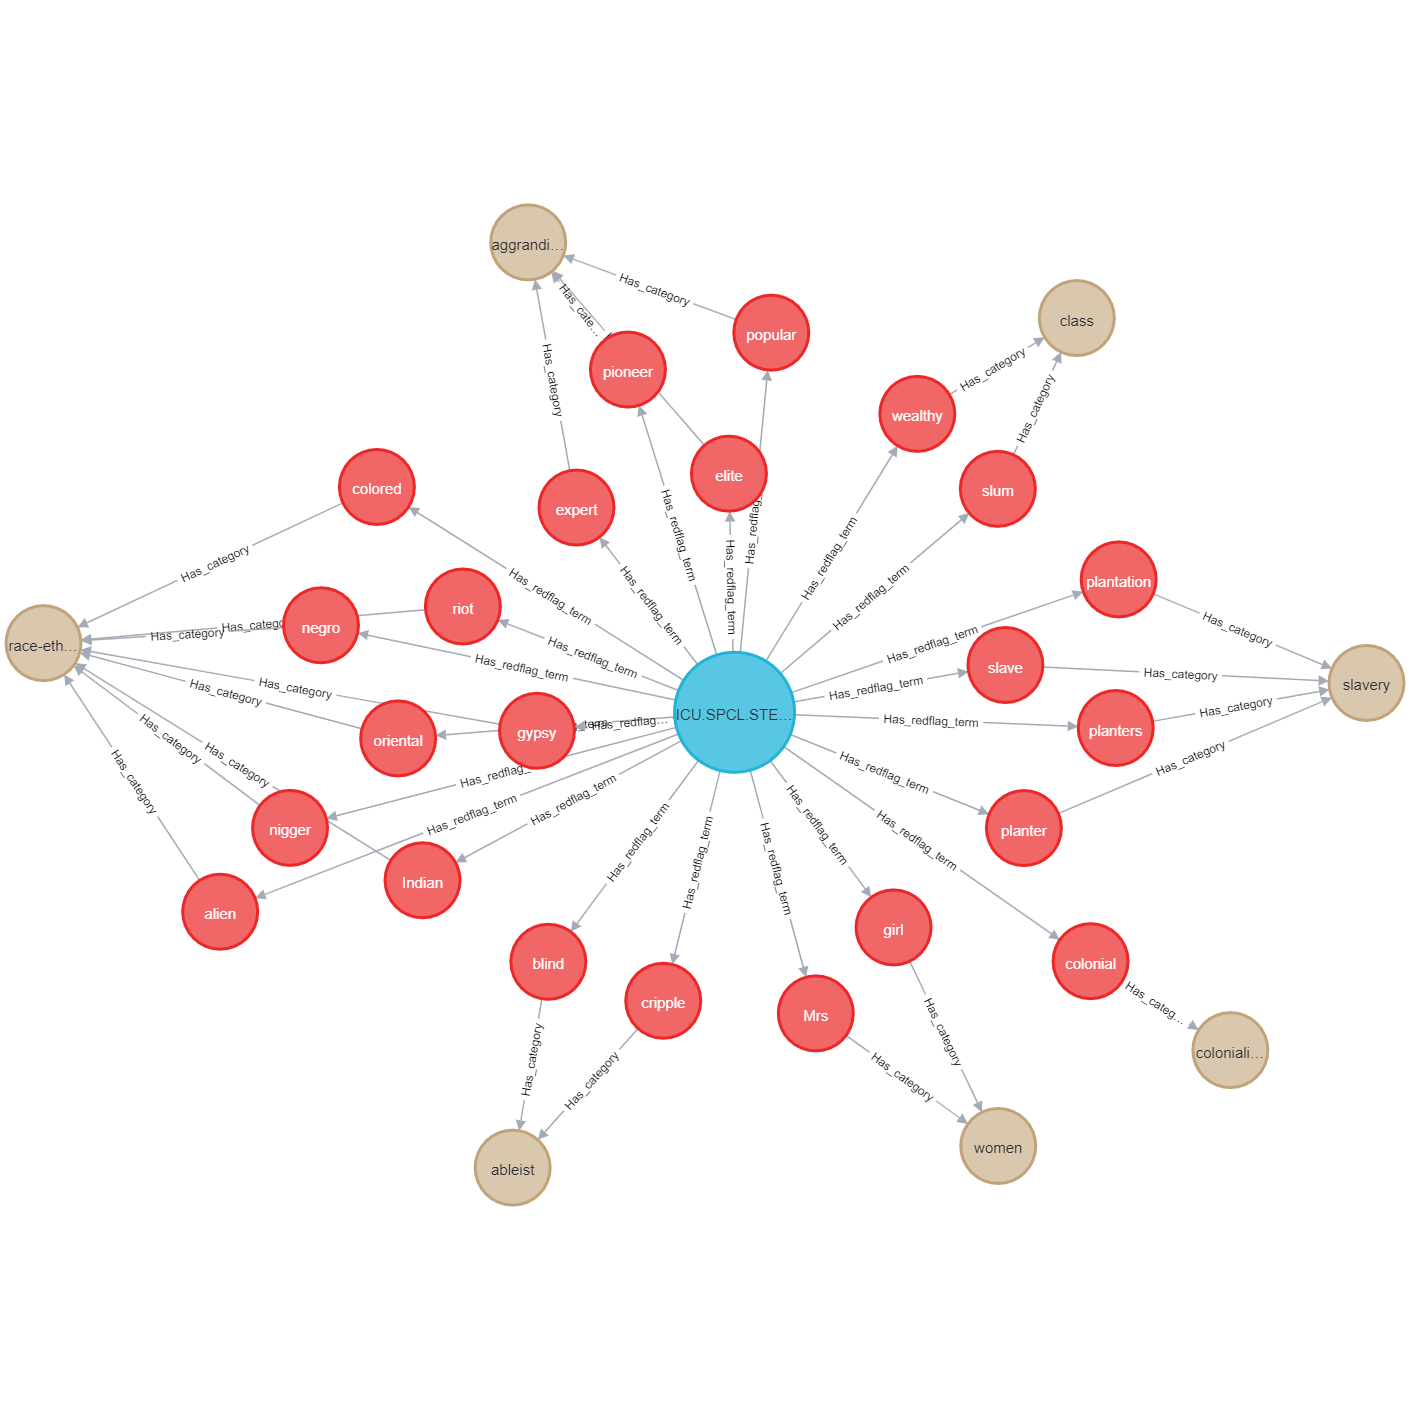

<a id='analysis'></a><a href='#back_to_top'>Back to top</a>

<a id='aggrandizement'></a>

## Aggrandizement
<a href="https://public.tableau.com/views/AggrandizementLanguageinFindingAidsFlaggedforReview/AggrandizementLanguageinFindingAids?:language=en-US&:display_count=n&:origin=viz_share_link">I created four visualizations of terms of aggrandizement</a>:
1. A histogram showing the number of times an aggrandizing “red flag” term appears across all UChicago finding aids.
2. A bubble graph showing the top terms of aggrandizement across all UChicago finding aids.
3. A bar graph showing terms of aggrandizement from highest count to lowest, and the finding aids that contain them.
4. A histogram showing finding aids arranged from “worst offender” in this category (highest term count) to “least offender” (lowest term count).

<div class='tableauPlaceholder' id='viz1660184316224' style='position: relative'><noscript><a href='#'><img alt='Aggrandizement Language in Finding Aids ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ag&#47;AggrandizementLanguageinFindingAidsFlaggedforReview&#47;AggrandizementLanguageinFindingAids&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='AggrandizementLanguageinFindingAidsFlaggedforReview&#47;AggrandizementLanguageinFindingAids' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ag&#47;AggrandizementLanguageinFindingAidsFlaggedforReview&#47;AggrandizementLanguageinFindingAids&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1660184316224');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='1077px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

The terms “important,” “pioneer,” “prominent,” “popular,” and “notable” account for 44% of the aggrandizement category. 

There are 33 finding aids with double-digit terms of aggrandizement, and together these account for 25% of aggrandizing language across all UChicago finding aids. 

The top five “worst offenders” in this category are:
<ul>
<li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.DONNELLEY">R.R. Donnelley and Sons Company. Archive</a> (Contains most instances of “important.” Neo4j graph below.)</li>
<li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.BENTONW">Benton, William. Papers</a> (Neo4j graph below.)</li>
<li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.LIBRARYEXHIBITPUBS">University of Chicago. Library. Exhibit Publications. Collection</a></li>
<li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.MERRIAMCE">Merriam, Charles E. Papers</a></li>
<li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.KLUTZNICK">Klutznick, Philip M. Papers<a> (Contains most instances of “notable.”)</li>
</ul>

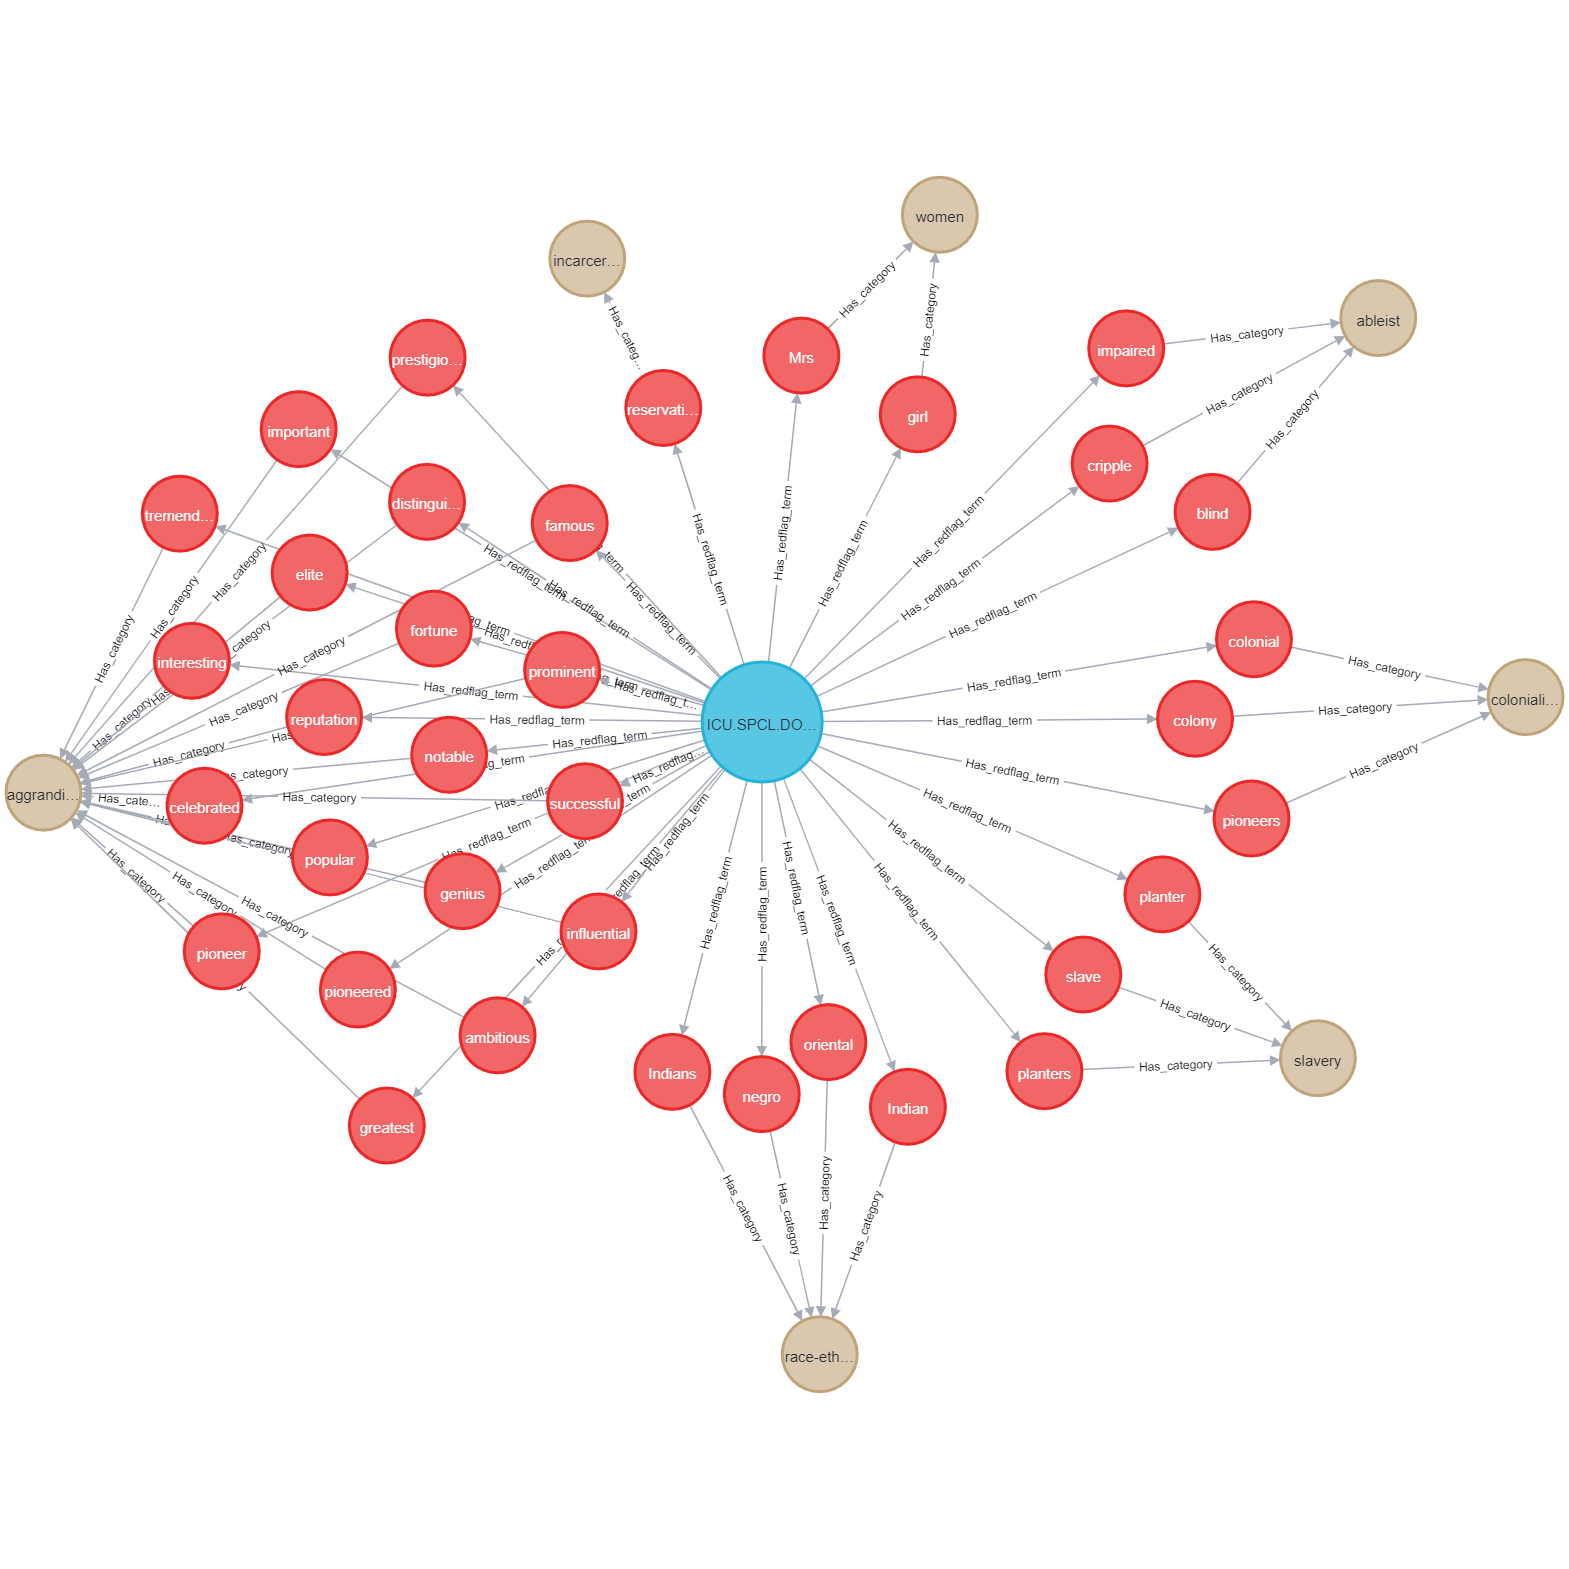

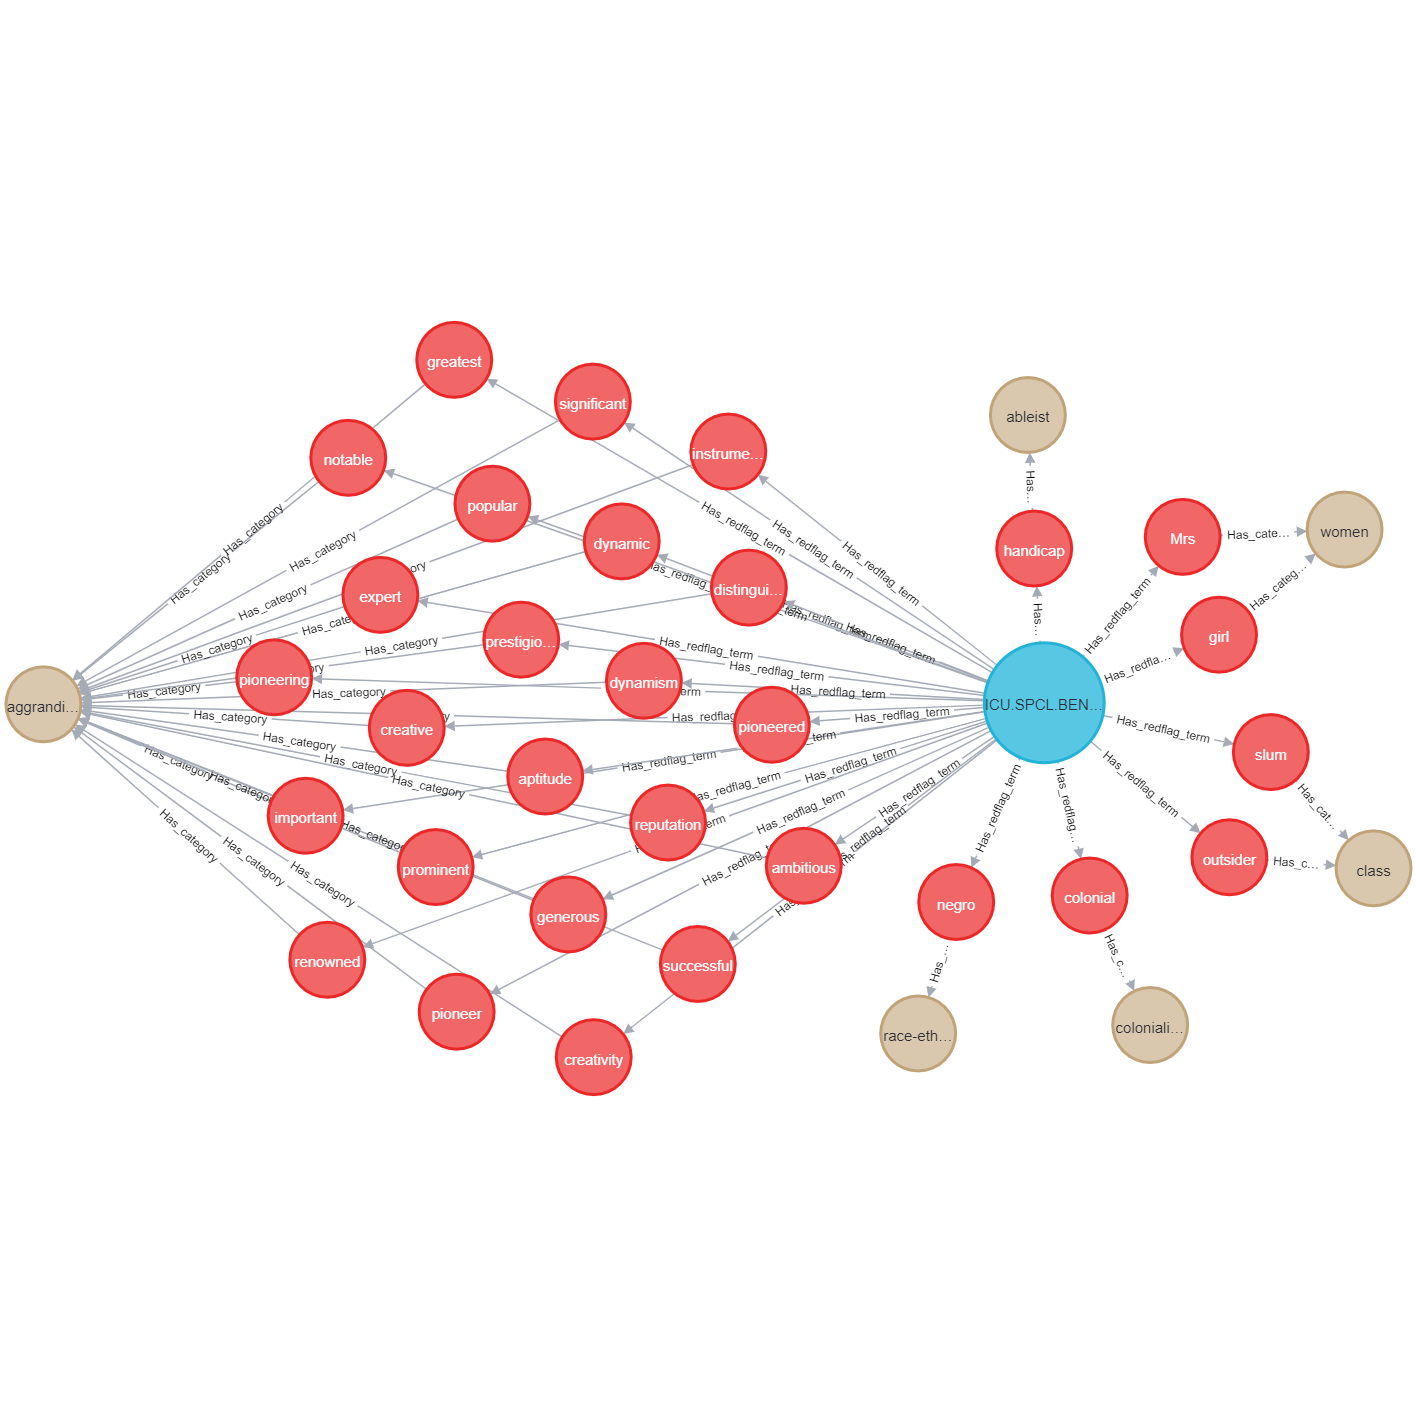

<a id='analysis'></a><a href='#back_to_top'>Back to top</a>

<a id='slavery'></a>

## Slavery
<a href="https://public.tableau.com/views/SlaveryLanguageinFindingAidsFlaggedforReview/SlaveryLanguageinFindingAids?:language=en-US&:display_count=n&:origin=viz_share_link">I created four visualizations in this category</a>:

1. A histogram showing the number of times a “red flag” term in this category appears across all UChicago finding aids.
2. A bar graph showing terms in this category from highest count to lowest, and the finding aids that contain them.
3. The same bar graph as above, with the finding aid for the “Slavery in North America Collection” excluded.
4. A histogram showing finding aids arranged from “worst offender” in this category (highest term count) to “least offender” (lowest term count).

<div class='tableauPlaceholder' id='viz1660185200270' style='position: relative'><noscript><a href='#'><img alt='Slavery Language in Finding Aids ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Sl&#47;SlaveryLanguageinFindingAidsFlaggedforReview&#47;SlaveryLanguageinFindingAids&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='SlaveryLanguageinFindingAidsFlaggedforReview&#47;SlaveryLanguageinFindingAids' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Sl&#47;SlaveryLanguageinFindingAidsFlaggedforReview&#47;SlaveryLanguageinFindingAids&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1660185200270');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='1077px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

The terms “slave” and “slaves” account for 78% of red flag terms in this category. Unsurprisingly, these terms occur most often in the finding aid for our Slavery in North America Collection. Excluding that collection (which was recently reprocessed using reparative description practices), the “worst offender” finding aids in this category with double-digit red flag terms are:
<ul>
    <li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.DOUGLASSA">Douglas, Stephen A. Papers</a> (Neo4j graph below.)</li>
    <li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.MORTONAGENCY">Morton, Charles, Agency. Collection of American Popular Drama</a></li>
    <li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.BOTANY">University of Chicago. Department of Botany. Records</a></li>
    <li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.LEWISF">Lewis, Fielding. Papers</a></li>
    <li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.MARTINEZM">Martinez, Maria Elena. Papers</a></li>
    <li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.LYNEE">Durrett, Reuben T. Collection. Edmund Lyne Estate Records</a></li>
</ul>

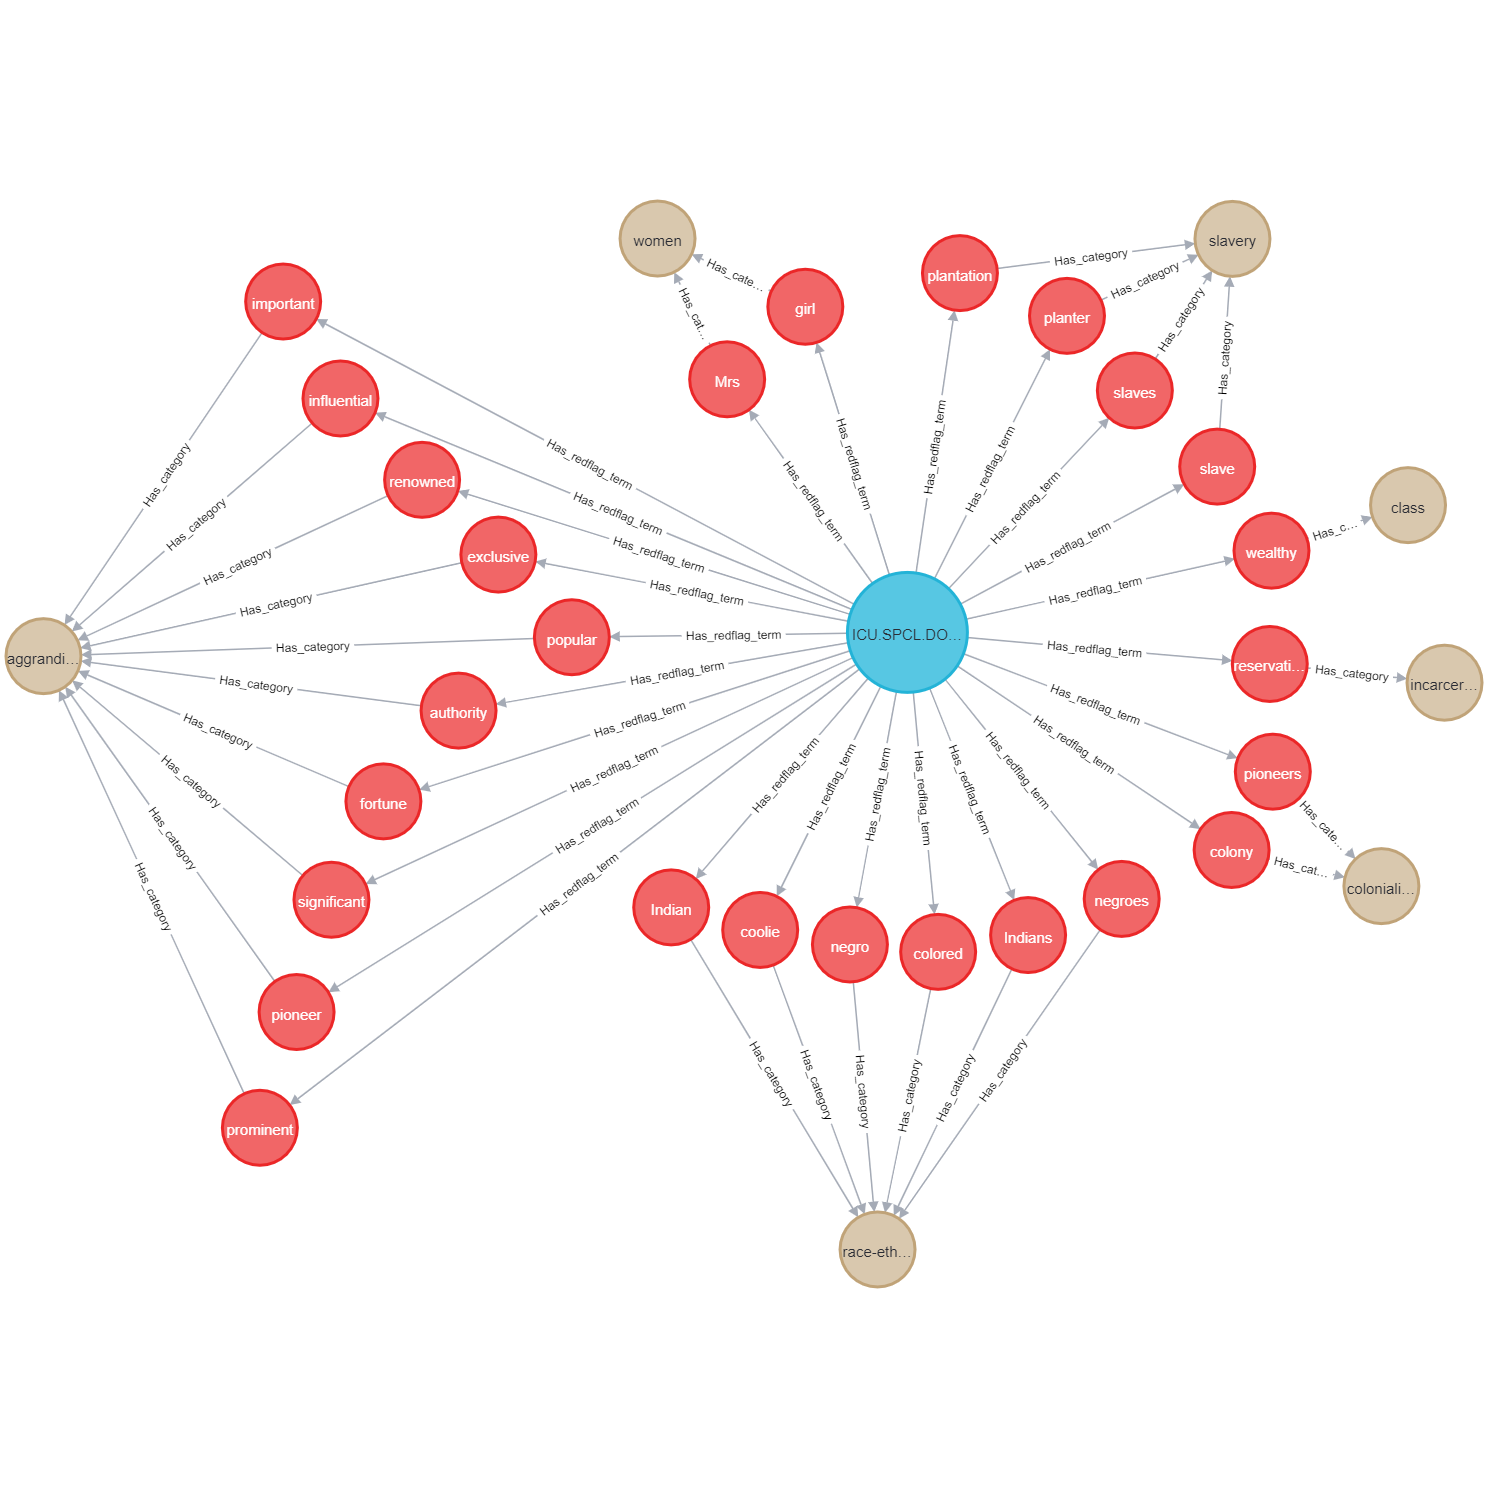

<a id='analysis'></a><a href='#back_to_top'>Back to top</a>

<a id='ableism'></a>

## Ableism
<a href="https://public.tableau.com/views/AbleistLanguageinFindingAidsFlaggedforReview/AbleistLanguageinFindingAids?:language=en-US&:display_count=n&:origin=viz_share_link">I created four visualizations of ableist language:</a>

1. A histogram showing the number of times an ableist “red flag” term appears across all UChicago finding aids.
2. A bubble graph showing the top ableist terms across all UChicago finding aids.
3. A bar graph showing ableist terms from highest count to lowest, and the finding aids that contain them.
4. A histogram showing finding aids arranged from “worst offender” in this category (highest term count) to “least offender” (lowest term count).

<div class='tableauPlaceholder' id='viz1660185667142' style='position: relative'><noscript><a href='#'><img alt='Ableist Language in Finding Aids ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ab&#47;AbleistLanguageinFindingAidsFlaggedforReview&#47;AbleistLanguageinFindingAids&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='AbleistLanguageinFindingAidsFlaggedforReview&#47;AbleistLanguageinFindingAids' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ab&#47;AbleistLanguageinFindingAidsFlaggedforReview&#47;AbleistLanguageinFindingAids&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1660185667142');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='1077px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

The terms “blind,” “cripple,” “elderly,” “suffered,” and “handicap” account for 63% of the ableism category. 

There are five finding aids with double-digit ableist terms, and together these account for 21% of ableist language across all UChicago finding aids:
<ul>
    <li><a  href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.HAVIGHURST">Havighurst, Robert J. Papers</a> (Contains most instances of term “elderly.” Neo4 j graph below.)</li>
<li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.CRMS398">Histories of Pediatric Hospitals. Collection/Crerar Ms 398</a> (contains most instances of term “cripple”)</li>
<li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.ACLUIL">American Civil Liberties Union. Illinois Division. Records</a> (contains most instances of term “handicap”)</li>
<li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.STARR">Starr, Frederick. Papers</a></li>
<li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.FISHBEIN">Fishbein, Morris. Papers</a></li>
</ul>

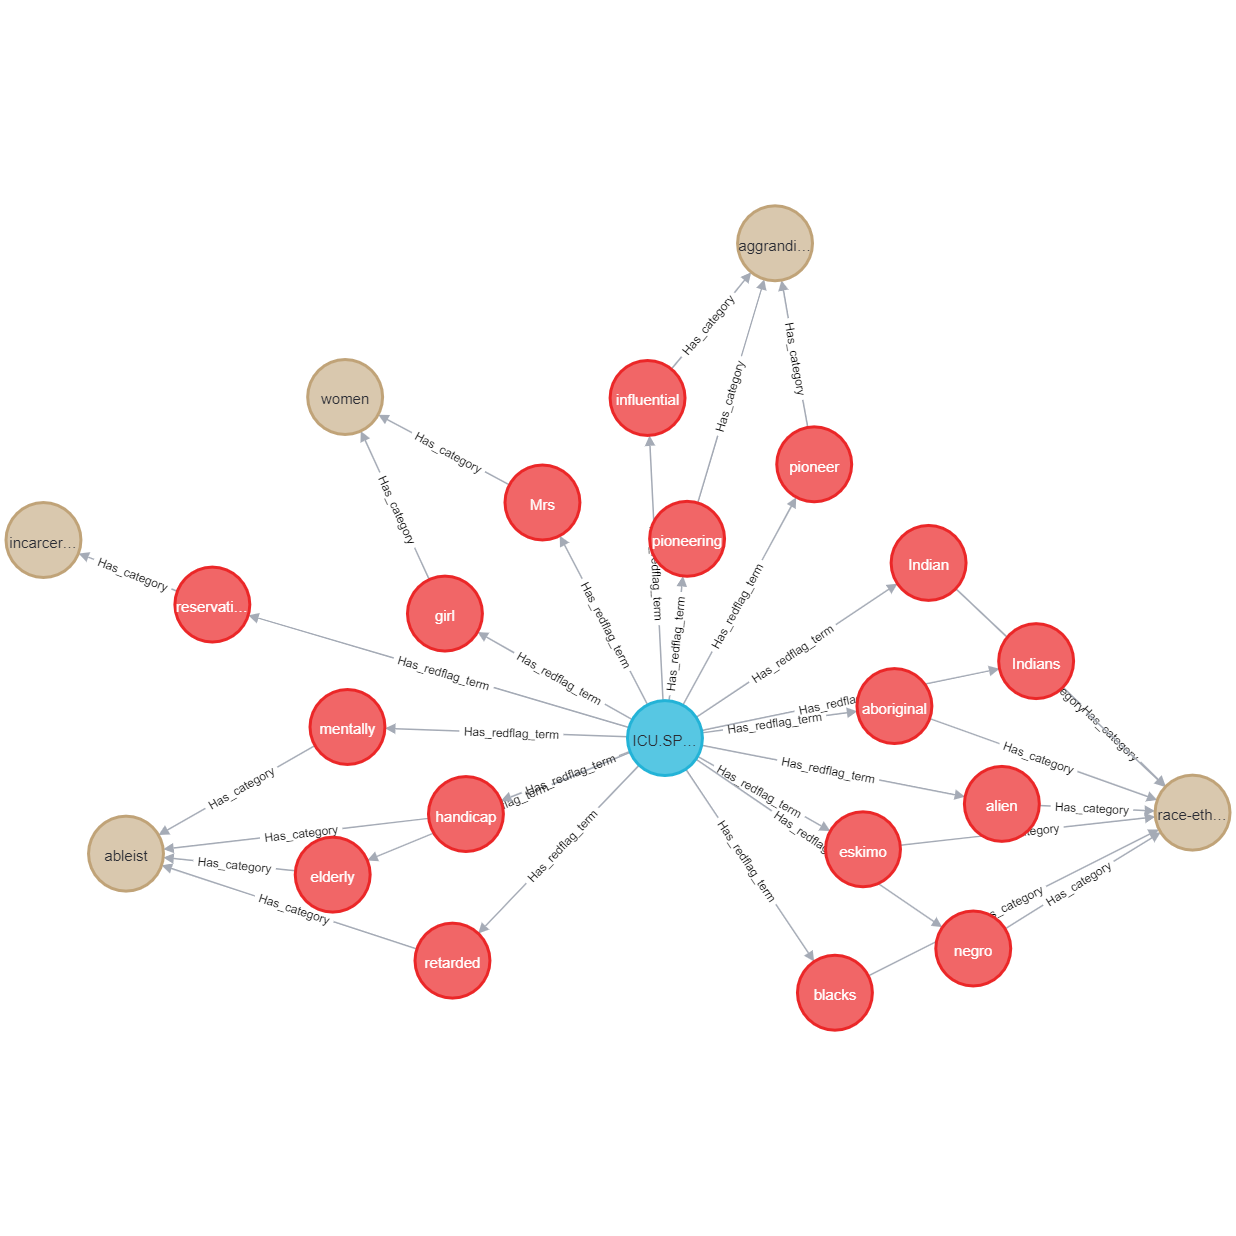

<a id='analysis'></a><a href='#back_to_top'>Back to top</a>

<a id='colonialism'></a>

## Colonialism
<a href="https://public.tableau.com/views/ColonialismLanguageinFindingAidsFlaggedforReview/ColonialismLanguageinFindingAids?:language=en-US&:display_count=n&:origin=viz_share_link">I created three visualizations in this category</a>:

1. A histogram showing the number of times a “red flag” term in this category appears across all UChicago finding aids.
2. A bar graph showing terms in this category from highest count to lowest, and the finding aids that contain them.
3. A histogram showing finding aids arranged from “worst offender” in this category (highest term count) to “least offender” (lowest term count).

<div class='tableauPlaceholder' id='viz1660186139706' style='position: relative'><noscript><a href='#'><img alt='Colonialism Language in Finding Aids ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Co&#47;ColonialismLanguageinFindingAidsFlaggedforReview&#47;ColonialismLanguageinFindingAids&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='ColonialismLanguageinFindingAidsFlaggedforReview&#47;ColonialismLanguageinFindingAids' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Co&#47;ColonialismLanguageinFindingAidsFlaggedforReview&#47;ColonialismLanguageinFindingAids&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1660186139706');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='977px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Terms in this category appear 346 times across all UChicago finding aids. Nine finding aids have double-digit counts of terms in this category, and account for 49% of the total term count in this category:
<ul>
    <li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.MARTINEZM">Martinez, Maria Elena. Papers</a> (Martinez studied Colonial Mexico.)</li>
<li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.CRMS226">Century of Progress International Exposition Publications</a> (Crerar Manuscript 226. Neo4j graph below.)</li>
<li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.DONNELLEY">R.R. Donnelley and Sons Company. Archive</a></li>
<li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.JGUNTHER">Gunther, John. Papers</a></li>
<li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.BARROWSH">Barrows, Harlan H. Papers</a></li>
<li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.HPHS">Hyde Park Historical Society Collection</a></li>
<li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.COHNB">Cohn, Bernard. Papers</a></li>
<li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.BOTANY">University of Chicago. Department of Botany. Records</a></li>
<li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.PRESSTEST">University of Chicago Press. Records</a></li>
</ul>

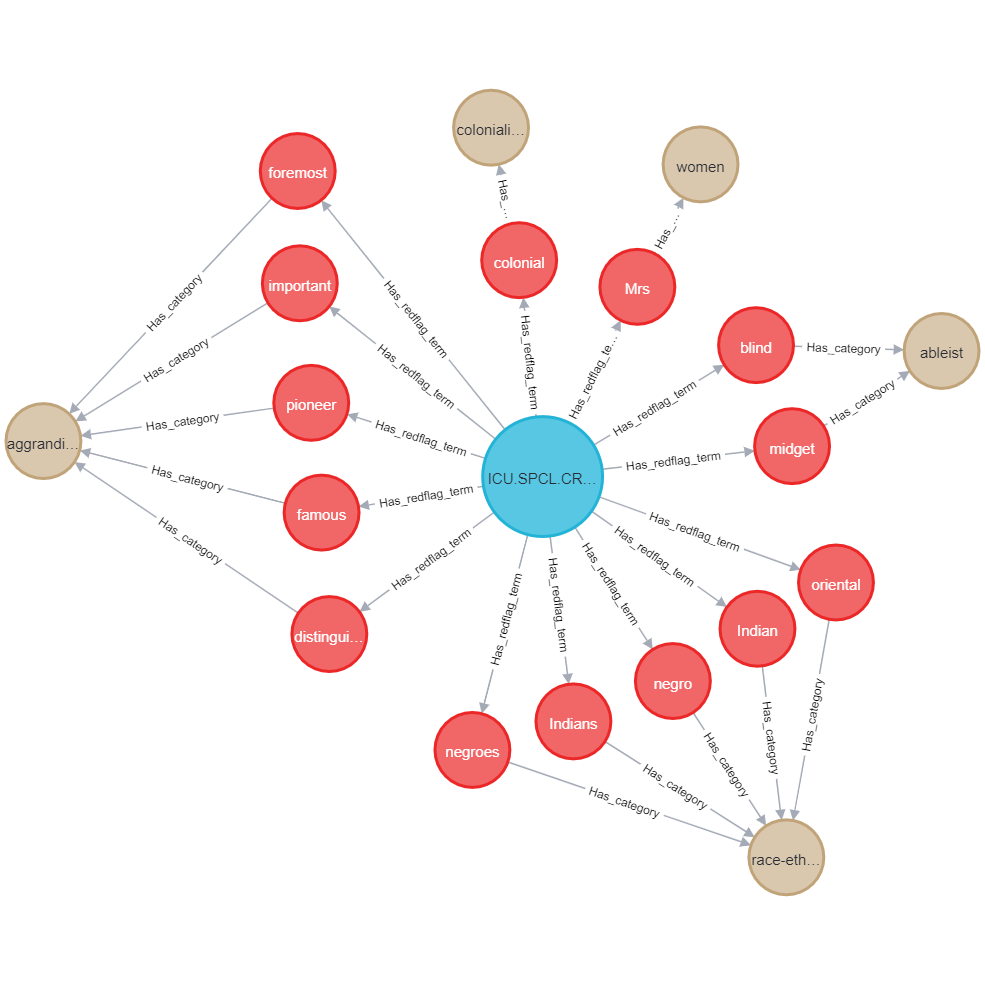

<a id='analysis'></a><a href='#back_to_top'>Back to top</a>

<a id='incarceration'></a>

## Incarceration and Forced Removal

<a href="https://public.tableau.com/views/IncarcerationandForcedRemovalLanguageinFindingAidsFlaggedforReview/IncarcerationandForcedRemovalLanguageinFindingAids?:language=en-US&:display_count=n&:origin=viz_share_link">I created three visualizations in this category</a>:

1. A histogram showing the number of times a “red flag” term in this category appears across all UChicago finding aids.
2. A bar graph showing terms in this category from highest count to lowest, and the finding aids that contain them.
3. A histogram showing finding aids arranged from “worst offender” in this category (highest term count) to “least offender” (lowest term count).

<div class='tableauPlaceholder' id='viz1660221304147' style='position: relative'><noscript><a href='#'><img alt='Incarceration and Forced Removal Language in Finding Aids ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;In&#47;IncarcerationandForcedRemovalLanguageinFindingAidsFlaggedforReview&#47;IncarcerationandForcedRemovalLanguageinFindingAids&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='IncarcerationandForcedRemovalLanguageinFindingAidsFlaggedforReview&#47;IncarcerationandForcedRemovalLanguageinFindingAids' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;In&#47;IncarcerationandForcedRemovalLanguageinFindingAidsFlaggedforReview&#47;IncarcerationandForcedRemovalLanguageinFindingAids&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1660221304147');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='977px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

The term “reservation” far outweighs other terms in this category, accounting for 84% of red flag terms in this category. Nearly one-third of red flag terms in this category occur in three finding aids:
<ul>
    <li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.NAESRIETZ">Native American Educational Services. Robert Rietz. Papers</a> (Neo4j graph below.)</li>
<li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.SCHWARZHAUPT">Emil Schwarzhaupt Foundation. Papers</a></li>
<li><a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.NAESFIELD">Native American Educational Services. Student Field Projects</a></li>
</ul>

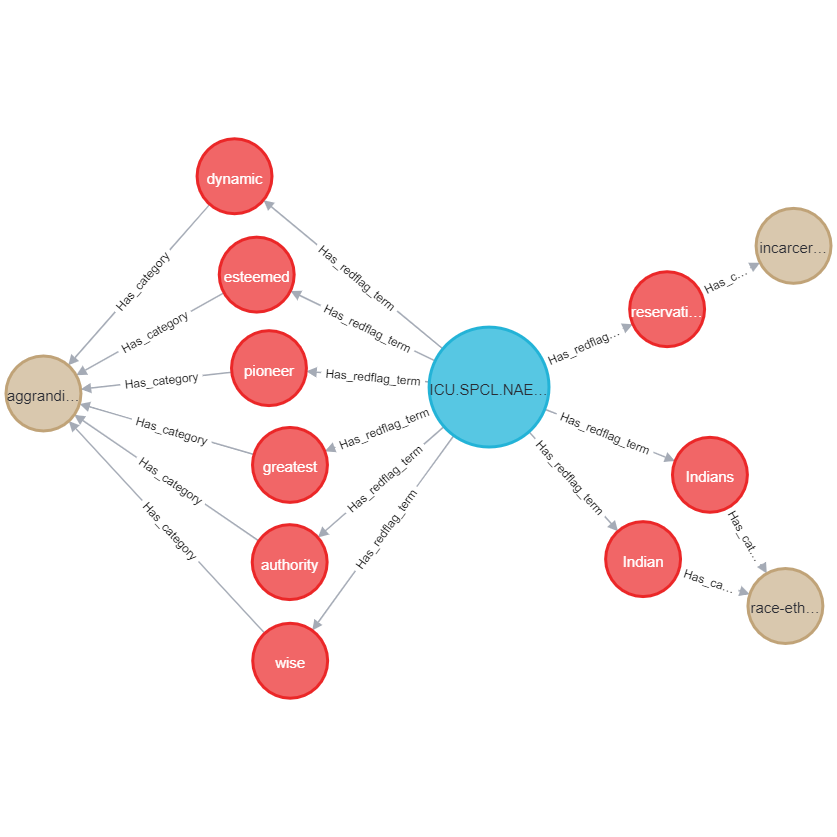

<a id='analysis'></a><a href='#back_to_top'>Back to top</a>

<a id='class'></a>

## Class
<a href="https://public.tableau.com/views/ClassLanguageinFindingAidsFlaggedforReview/ClassLanguageinFindingAids?:language=en-US&:display_count=n&:origin=viz_share_link">I created three visualizations of class terms</a>:

1. A histogram showing the number of times a “red flag” term in this category appears across all UChicago finding aids.
2. A bar graph showing terms in this category from highest count to lowest, and the finding aids that contain them.
3. A histogram showing finding aids arranged from “worst offender” in this category (highest term count) to “least offender” (lowest term count).

<div class='tableauPlaceholder' id='viz1660221600417' style='position: relative'><noscript><a href='#'><img alt='Class Language in Finding Aids ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Cl&#47;ClassLanguageinFindingAidsFlaggedforReview&#47;ClassLanguageinFindingAids&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='ClassLanguageinFindingAidsFlaggedforReview&#47;ClassLanguageinFindingAids' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Cl&#47;ClassLanguageinFindingAidsFlaggedforReview&#47;ClassLanguageinFindingAids&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1660221600417');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='977px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

“Slum” occurs the most often across all UChicago finding aids and accounts for 54% of this category. The <a href="https://www.lib.uchicago.edu/e/scrc/findingaids/view.php?eadid=ICU.SPCL.HPHS">Hyde Park Historical Society Collection finding aid</a> has the most terms (6) in this category, and the most instances of the word “slum” (5).

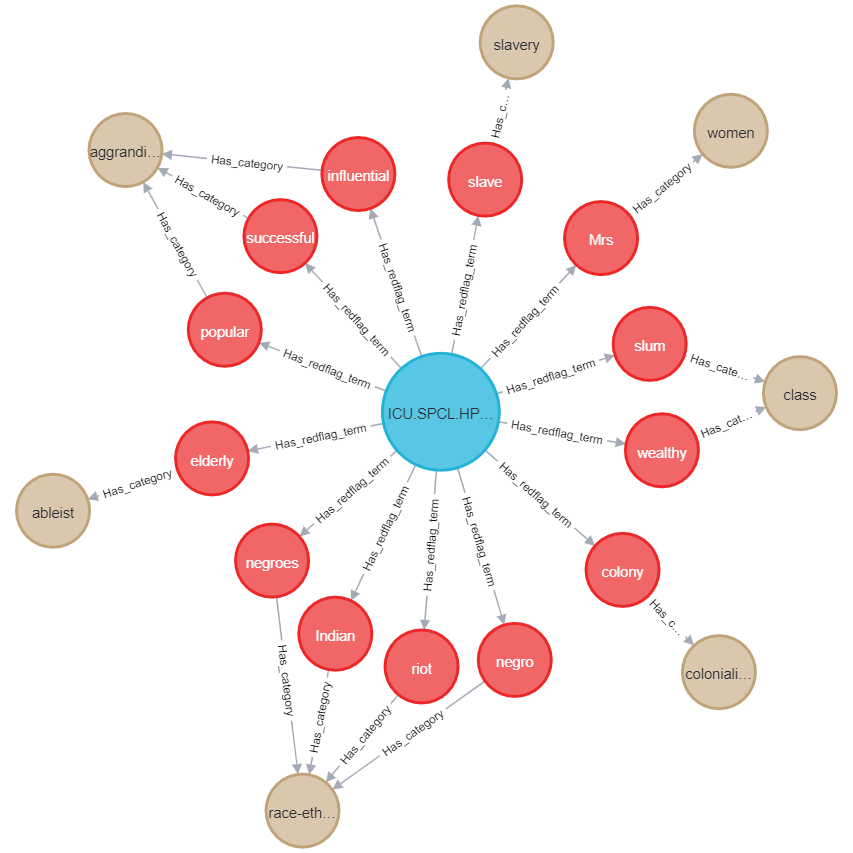

<a id='analysis'></a><a href='#back_to_top'>Back to top</a>

<a id='recommendations'></a>

# Recommendations

<a id='workflow'></a>

## Workflow
There is no one-size-fits-all approach to reparative description. Remediation of legacy metadata will take time, and a careful case-by-case analysis. 

One could start at the top of the “worst offender” finding aid list and work your way down the list, finding aid by finding aid. 

I suggest approaching the work in phases, and structuring it by red flag term category, moving from categories with the highest term counts to categories with the lowest term counts. 

Again, that order is:
<ul>
<li>Race, Ethnicity, and Citizenship</li>
<li>Sexism</li>
<li>Aggrandizement</li>
<li>Slavery</li>
<li>Ableism</li>
<li>Colonialism</li>
<li>Incarceration and Forced Removal</li>
<li>Class</li>
    </ul>
    
My analysis of the data indicates that we have a lot of collections to review related to Native Americans. This suggests that we could have a lengthy reparative description project devoted solely to Native American and other Indigenous collections, separately from other finding aids in the “Race, Ethnicity, and Citizenship” category.<br><br>

A reminder that LGBTQ+ terms were not included in this planning project. That does not mean that reparative description of LGBTQ+ collections is less important or should come last. As explained in <a href='#lexicon'>my discussion of the lexicon</a>, LGBTQ+ collections require a different approach to data gathering and project planning. I strongly suggest that work on LGBTQ+ finding aids be a high priority alongside Race, Ethnicity, and Citizenship finding aids.

There will likely be a learning curve for each category, and productivity may increase if focused attention is given to finding aids one category at a time. There will be an overlap between categories (race, ethnicity, citizenship, colonialism, slavery, incarceration and forced removal are all intertwined), so knowledge gained in one category will likely influence another with the potential for revisiting some categories. 

Until staffing levels are increased and significant resources are devoted to reparative description at the University of Chicago Library Hanna Holborn Gray Special Collections Research Center, I recommend reviewing finding aids from “worst offender” to “least offender” in a category. Use of the original XML-Term-Detective output is advised for quickly identifying the line number and text containing a red flag term. This is an imperfect, but simple and quick way to prioritize finding aids for reparative description. The final dataset is far from perfect, and it is very possible that some of the “worst offenders” will prove to be noise in the data. I also acknowledge that offense caused by a single red flag term (such as a slur) in a finding aid could be greater than offense caused by a finding aid with multiple red flag terms. 

If an institution has the time and resources, a <a href="https://www.verywellhealth.com/medical-triage-and-how-it-works-2615132">triage system</a> could be developed to prioritize finding aids for reparative description. Criteria could be developed that sift finding aids into levels from most to least urgent.  This is the approach taken by the Getty Research Institute’s Anti-Racist Description Working Group. <a href="https://docs.google.com/document/d/1JMiGWfCoCv0CQr3GoCQEhqC7gN33c3o-0pIdzEl6IE4/edit">See their rubric.</a> This is time-intensive, subjective work that requires a person to review each finding aid one by one.

A project manual should be developed for each category that includes style guides and controlled vocabularies relevant to that category. 

Ideally, the project manual would be developed in consultation with subject experts and with living individuals or communities whose records are described. This is especially important for finding aids in the Race, Ethnicity, and Citizenship category. All consultants should be compensated for their time and labor. 

<a id='policy'></a>

## Policy Setting and Editing Finding Aids
Reparative description of finding aids should take several forms:

1. Removing and updating language OR
2. Keeping language in place, but adding contextualization and additional keywords for discoverability AND
3. Adding a collection-level content warning about the presence of harmful, biased, or culturally sensitive metadata.
4. Adding additional description to improve discoverability, including access terms for “hidden figures” and bilingual description for collections containing significant amounts of non-English-language materials.
5. Adding an obvious and easy feedback mechanism for finding aid users.

Many red flag terms appear in original folder headings or titles of published works. In cases such as this, I recommend keeping the language in place, adding a content warning to the finding aid, and any additional contextualizing metadata deemed necessary.

Reasons for when and why to remove or keep harmful language should be clearly spelled out in a Reparative Description Policy. Guidelines for how to apply the policy should be incorporated in each project manual.

<a id='analysis'></a><a href='#back_to_top'>Back to top</a>

<a id='resources'></a>

# Resources
<a href="https://archivesforblacklives.wordpress.com/resources/">Archives for Black Lives in Philadelphia Anti-Racist Description Resources</a>

Australian Institute of Aboriginal and Torres Strait Islander Studies, <a href="https://collection.aiatsis.gov.au/austlang/about">AustLang controlled vocabulary for Aboriginal and Torres Strait Islander languages</a>

Brown, Lydia X. Z., <a href="https://www.autistichoya.com/p/ableist-words-and-terms-to-avoid.html">Glossary of Ableist Language</a>

Cataloging Lab, <a href="https://cataloginglab.org/list-of-statements-on-bias-in-library-and-archives-description/">List of Statements on Bias in Library and Archives Description</a>

<a href="https://consciousstyleguide.com/">Conscious Style Guide</a>

<a href="https://docs.google.com/spreadsheets/d/19solOX6tQTYvlF4lr_JNz2WlcsA76CcK3bxvYZ8cHzg/edit#gid=0">DEI Controlled Vocabs Resource List</a>

<a href="https://www.digitaltransgenderarchive.net/">Digital Transgender Archive</a>

First Archivist Circle, <a href="https://www2.archivists.org/groups/native-american-archives-section/protocols-for-native-american-archival-materials-information-and-resources-page">Protocols for Native American Archival Materials</a>

Foreman, P. Gabrielle, et al. <a href="https://docs.google.com/document/d/1A4TEdDgYslX-hlKezLodMIM71My3KTN0zxRv0IQTOQs/edit">“Writing about Slavery/Teaching About Slavery: This Might Help”</a>

Frick, Rachel L., and Merrilee Proffitt. 2022. <a href="https://doi.org/10.25333/wd4b-bs51">Reimagine Descriptive Workflows: A Community-informed Agenda for Reparative and Inclusive Descriptive Practice.</a> Dublin, OH: OCLC Research 

<a href="https://homosaurus.org/">Homosaurus</a>, an International LGBTQ+ Linked Data Vocabulary

Indigenous Corporate Training, Inc., <a href="https://www.ictinc.ca/blog/indigenous-peoples-terminology-guidelines-for-usage">Indigenous Peoples terminology guidelines for usage</a>

Local Contexts, <a href="https://localcontexts.org/labels/traditional-knowledge-labels/">TK Labels</a>

Mizota, Sharon. <a href="https://www.sharonmizota.com/resources/">Free Resources About Bias and Metadata</a>

National and State Libraries Australasia, <a href="https://www.nsla.org.au/resources">Culturally Safe Libraries Program Resources</a>

National Center on Disability and Journalism, <a href="https://ncdj.org/style-guide/">Disability Language Style Guide</a>

Society of American Archivists, Description Section, <a href="https://www2.archivists.org/groups/description-section/inclusive-description">Inclusive Description resources</a> 

Society of American Archivists, Native American Archives Section, <a href="https://www2.archivists.org/groups/native-american-archives-section/naas-reparative-description-webinar-now-available">Implementing Reparative Description for Indigenous Collections</a>

Trans Metadata Collective, <a href="https://doi.org/10.5281/zenodo.6687057">Metadata Best Practices for Trans and Gender Diverse Resources</a>

University of Nevada, Las Vegas <a href="https://docs.google.com/spreadsheets/d/19IfkxCiqMUfTuGwHqLBoThMaftUbaWs9G27jjFIVkX4/edit#gid=1431491491">Native American Names Cross Reference</a>

Wilson Special Collections Library, University of North Carolina Chapel Hill, <a href="https://cdr.lib.unc.edu/downloads/5q47rz05z?locale=en">A Guide to Conscious Editing at Wilson Special Collections Library</a>, (download)

Young, Gregory. <a href="https://www.brusheducation.ca/books/elements-of-indigenous-style">Elements of Indigenous Style: A Guide for Writing by and About Indigenous Peoples</a>

<a id='examples'></a>

## Examples
Clemens, Alison, Jennifer Coggins, Michelle Peralta, and Jessica Tai,, <a href="https://saadescription.wordpress.com/2022/03/28/addressing-missing-name-information-for-women-in-yale-special-collections/">“Addressing Missing Name Information for Women in Yale Special Collections</a>,” Descriptive Notes, Society of American Archivists Description Section.

Bredbenner, Stephanie and Jessica Tai, “<a href="https://www.newenglandarchivists.org/resources/Documents/Newsletter/2021/NEA 2021 January.pdf">Remediating Euphemistic Language in Yale’s Collections Documenting Japanese American Incarceration</a>,” New England Archivists Newsletter. Vol. 48, no. 1 (2021): 5-7. 

Brewer, Celeste. “<a href="https://mydigitalpublication.com/publication/?m=30305&i=494339&p=6&ver=html5">Processing LGBTQ Collections Then and Now</a>,” Archival Outlook. May/June 2018: 4-5.

Morretti, Annalisa. “<a href="https://mydigitalpublication.com/publication/?m=30305&i=728963&p=10&ver=html5">Reparative Description of Disability Collections</a>,” Archival Outlook. Nov/Dec 2021: 8-9.

Suárez, Armando, “<a href="https://saadescription.wordpress.com/2021/12/02/spanish-language-finding-aids-at-princeton/">Spanish-Language Finding Aids at Princeton University Library</a>,” Descriptive Notes, Society of American Archivists Description Section.

<a id='analysis'></a><a href='#back_to_top'>Back to top</a>

<a id='appendix'></a>

# Appendix
## XML-Term-Detective Files
<ul>
<li><a href="https://cases.umd.edu/user/ashleygosselar/doc/tree/ashleygosselar/lexicon_edited.csv">Lexicon</a></li>
<li><a href="https://cases.umd.edu/user/ashleygosselar/doc/tree/ashleygosselar/xml-term-detective-count.csv">Output, Term Count</a></li>
<li><a href="https://cases.umd.edu/user/ashleygosselar/doc/tree/ashleygosselar/xml-term-detective-full.output.csv">Full Output with Line Numbers and Text</a></li>
<li><a href="https://cases.umd.edu/user/ashleygosselar/doc/tree/ashleygosselar/xml-term-detective-enhanced.csv">Full Output with Line Numbers and Text, Cleaned and Enhanced</a></li>
</ul>

## Tableau
<ul>
    <li><a href="https://cases.umd.edu/user/ashleygosselar/doc/tree/ashleygosselar/UChicago%2520Finding%2520Aids%2520Reparative%2520Description%2520Data.pdf">All Tableau Worksheets and Dashboards (static PDF)</a></li>
</ul>

## Neo4j
<ul>
    <li><a href="https://cases.umd.edu/user/ashleygosselar/doc/tree/ashleygosselar/Neo4j%2520graphs.zip">Neo4j "Worst Offender" Graphs (zip)</a></li>
</ul>

<a id='analysis'></a><a href='#back_to_top'>Back to top</a>